# Initialize Settings

In [1]:
from numpy import NaN
import numpy as np
import pandas as pd 
import urllib.request
import requests
import io
import csv
import geopy.distance
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Set option to format printing of Float columns
pd.options.display.float_format = '{:.2f}'.format

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Mount Google Drive

from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/gdrive') 
%cd /gdrive/My\ Drive/MSDS\ 498\ Capstone/4.\ Analytics/4a.\ Data 

Mounted at /gdrive
/gdrive/My Drive/MSDS 498 Capstone/4. Analytics/4a. Data


# Import Data Files

In [4]:
# Import Primary Data File
df1 = pd.read_csv('Condensed.csv', low_memory=False)
df1.shape
df1.info(verbose=True, show_counts=True )
df1.head()

(20051, 157)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20051 entries, 0 to 20050
Data columns (total 157 columns):
 #    Column                                                  Non-Null Count  Dtype  
---   ------                                                  --------------  -----  
 0    Unnamed: 0                                              20051 non-null  int64  
 1    PID                                                     20051 non-null  int64  
 2    GIS_ID                                                  20051 non-null  int64  
 3    ST_NUM                                                  20051 non-null  object 
 4    ST_NAME                                                 20051 non-null  object 
 5    ST_NAME_SUF                                             20028 non-null  object 
 6    UNIT_NUM                                                0 non-null      float64
 7    ZIPCODE                                                 20051 non-null  int64  
 8    LU                      

,Unnamed: 0,PID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,LU,OWN_OCC,...,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price
0,0,1000019000,1000019000,3,WORTHINGTON,ST,NaN,2120,R1,Y,...,196.38,1453.39,196.38,F_763723_2946909,OBRIEN MARY V,3 WORTHINGTON ST,ROXBURY,2120.00,19910724,9
1,1,1000024000,1000024000,13,WORTHINGTON,ST,NaN,2120,R1,Y,...,196.70,1441.24,196.70,F_763760_2946990,HASSMAN DAVID,13 WORTHINGTON ST,ROXBURY,2120.00,20160701,817500
2,2,1000027000,1000027000,19,WORTHINGTON,ST,NaN,2120,R1,Y,...,197.37,1467.31,197.37,F_763782_2947039,ILLIGENS BEN,19 WORTHINGTON ST,ROXBURY,2120.00,20070615,815000
3,3,1000029000,1000029000,23,WORTHINGTON,ST,NaN,2120,R1,Y,...,197.64,1489.28,197.64,F_763798_2947072,EDRAOS PATRICIA,23 WORTHINGTON,ROXBURY,2120.00,19870101,0
4,4,1000093000,1000093000,11,WIGGLESWORTH,ST,NaN,2120,R1,Y,...,192.13,1433.54,192.13,F_763573_2947068,DIXON LORETTA M,11 WIGGLESWORTH ST,ROXBURY,2120.00,19870101,0


In [5]:
# Remove Row Number Column
df1 = df1.iloc[:,1:]
df1.shape
df1.info(verbose=True, show_counts=True )
df1.head()

(20051, 156)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20051 entries, 0 to 20050
Data columns (total 156 columns):
 #    Column                                                  Non-Null Count  Dtype  
---   ------                                                  --------------  -----  
 0    PID                                                     20051 non-null  int64  
 1    GIS_ID                                                  20051 non-null  int64  
 2    ST_NUM                                                  20051 non-null  object 
 3    ST_NAME                                                 20051 non-null  object 
 4    ST_NAME_SUF                                             20028 non-null  object 
 5    UNIT_NUM                                                0 non-null      float64
 6    ZIPCODE                                                 20051 non-null  int64  
 7    LU                                                      20051 non-null  object 
 8    OWN_OCC                 

,PID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,LU,OWN_OCC,OWNER,...,Shape_ST_2,Shape__Area,Shape__Length,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price
0,1000019000,1000019000,3,WORTHINGTON,ST,NaN,2120,R1,Y,OBRIEN MARY V,...,196.38,1453.39,196.38,F_763723_2946909,OBRIEN MARY V,3 WORTHINGTON ST,ROXBURY,2120.00,19910724,9
1,1000024000,1000024000,13,WORTHINGTON,ST,NaN,2120,R1,Y,HASSMAN DAVID,...,196.70,1441.24,196.70,F_763760_2946990,HASSMAN DAVID,13 WORTHINGTON ST,ROXBURY,2120.00,20160701,817500
2,1000027000,1000027000,19,WORTHINGTON,ST,NaN,2120,R1,Y,ILLIGENS BEN,...,197.37,1467.31,197.37,F_763782_2947039,ILLIGENS BEN,19 WORTHINGTON ST,ROXBURY,2120.00,20070615,815000
3,1000029000,1000029000,23,WORTHINGTON,ST,NaN,2120,R1,Y,EDRAOS PATRICIA,...,197.64,1489.28,197.64,F_763798_2947072,EDRAOS PATRICIA,23 WORTHINGTON,ROXBURY,2120.00,19870101,0
4,1000093000,1000093000,11,WIGGLESWORTH,ST,NaN,2120,R1,Y,DIXON LORETTA M,...,192.13,1433.54,192.13,F_763573_2947068,DIXON LORETTA M,11 WIGGLESWORTH ST,ROXBURY,2120.00,19870101,0


# Calculate Distance to the Center of Boston

In [6]:
# Import Latitude and Longitude by Property 
coords_df = pd.read_csv('GeoCode/pa_2022_geocoded.csv')
coords_df = coords_df[["PID","LATITUDE","LONGITUDE"]]
coords_df.info()
coords_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25640 entries, 0 to 25639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        25640 non-null  int64  
 1   LATITUDE   25217 non-null  float64
 2   LONGITUDE  25217 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 601.1 KB


,PID,LATITUDE,LONGITUDE
0,802870050,42.32,-71.08
1,1101083000,NaN,NaN
2,1102053000,42.31,-71.10
3,1301250010,42.32,-71.07
4,700950000,42.34,-71.05


In [7]:
# Set a Tuple of Lat/Long for the center of Boston
boston = (42.361145, -71.057083)
 # Determine number of rows
nrecs = coords_df.shape[0]

# Initialize an empty list of distances
distances = []

for i in range(nrecs):
    cpid = coords_df.iloc[i,0]
    lat  = coords_df.iloc[i,1]
    long = coords_df.iloc[i,2]
    coords = (lat, long)
    if lat>0 :
      dist = geopy.distance.geodesic(coords, boston).miles
    else:
      dist = NaN
    
    distances.append(dist)
    #print( i, cpid, lat, long, coords, dist)

# Append Distances to DataFrame
coords_df["DISTANCE"] =  distances
coords_df.head()
coords_df.info()

,PID,LATITUDE,LONGITUDE,DISTANCE
0,802870050,42.32,-71.08,2.74
1,1101083000,NaN,NaN,NaN
2,1102053000,42.31,-71.10,4.03
3,1301250010,42.32,-71.07,3.15
4,700950000,42.34,-71.05,1.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25640 entries, 0 to 25639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        25640 non-null  int64  
 1   LATITUDE   25217 non-null  float64
 2   LONGITUDE  25217 non-null  float64
 3   DISTANCE   25217 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 801.4 KB


In [8]:
# Add Distance to Primary Data

df2 = pd.merge(df1, coords_df, left_on='PID', right_on="PID", how='left') 
df2.shape
df2.head()

(20051, 159)

,PID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,LU,OWN_OCC,OWNER,...,loc_id,owner1,own_addr,own_city,own_zip,sale_date,sale_price,LATITUDE,LONGITUDE,DISTANCE
0,1000019000,1000019000,3,WORTHINGTON,ST,NaN,2120,R1,Y,OBRIEN MARY V,...,F_763723_2946909,OBRIEN MARY V,3 WORTHINGTON ST,ROXBURY,2120.00,19910724,9,42.33,-71.10,2.99
1,1000024000,1000024000,13,WORTHINGTON,ST,NaN,2120,R1,Y,HASSMAN DAVID,...,F_763760_2946990,HASSMAN DAVID,13 WORTHINGTON ST,ROXBURY,2120.00,20160701,817500,42.33,-71.10,2.98
2,1000027000,1000027000,19,WORTHINGTON,ST,NaN,2120,R1,Y,ILLIGENS BEN,...,F_763782_2947039,ILLIGENS BEN,19 WORTHINGTON ST,ROXBURY,2120.00,20070615,815000,42.33,-71.10,2.97
3,1000029000,1000029000,23,WORTHINGTON,ST,NaN,2120,R1,Y,EDRAOS PATRICIA,...,F_763798_2947072,EDRAOS PATRICIA,23 WORTHINGTON,ROXBURY,2120.00,19870101,0,42.33,-71.10,2.96
4,1000093000,1000093000,11,WIGGLESWORTH,ST,NaN,2120,R1,Y,DIXON LORETTA M,...,F_763573_2947068,DIXON LORETTA M,11 WIGGLESWORTH ST,ROXBURY,2120.00,19870101,0,42.33,-71.10,3.00


# Remove Columns Known NOT to be Needed for Modeling -- First Pass

In [9]:
# Create List of Columns to Drop
droplist = ['GIS_ID'
,'ST_NUM'
,'ST_NAME'
,'ST_NAME_SUF'
,'UNIT_NUM'
,'ZIPCODE'
,'LU'
,'OWN_OCC'
,'OWNER'
,'MAIL_ADDRESSEE'
,'MAIL_ADDRESS'
,'MAIL CS'
,'MAIL_ZIPCODE'
,'R_BTH_STYLE3'
,'R_KITCH_STYLE2'
,'R_KITCH_STYLE3'
# ,'U_KITCH_STYLE'
,'bi_pid_long'
,'bi_st_name'
,'bi_census_tract_number'
,'inc_Census Tract'
# ,'as_Census Tract'
# ,'edu_Census Tract'
,'MAP_PAR_ID'
,'LOC_ID'
,'Shape_STAr'
,'Shape_STLe'
,'Shape_ST_1'
,'Shape_ST_2'
,'Shape__Area'
,'Shape__Length'
,'loc_id'
,'owner1'
,'own_addr'
,'own_city'
,'own_zip'
,'LATITUDE'
,'LONGITUDE'
,'bi_dashp_only'
,'bi_dashp_and_elec_upgrade'
,'bi_dashp_outdoor'
,'edu_Othr_Age_25_plus_high_school_median_12mos_earnings'
,'inc_othr_hh_non_fam_inc_median'
]
print("Number of columns to drop: "+ str(len(droplist)))

df2.drop(droplist, axis=1, inplace=True)
df2.shape
df2.info(verbose=True, show_counts=True ) 

Number of columns to drop: 40


(20051, 119)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20051 entries, 0 to 20050
Data columns (total 119 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           20051 non-null  int64  
 1    AV_LAND                                       20051 non-null  int64  
 2    AV_BLDG                                       20051 non-null  int64  
 3    AV_TOTAL                                      20051 non-null  int64  
 4    LAND_SF                                       20046 non-null  float64
 5    YR_BUILT                                      20051 non-null  int64  
 6    YR_REMOD                                      19027 non-null  float64
 7    GROSS_AREA                                    20051 non-null  int64  
 8    LIVING_AREA                                   20051 non-null  int64  
 9    NUM_FLOORS                                    20

# Convert Date Columns to Age Columns


### Convert YEAR BUILT to AGE BUILT

In [10]:
df2["YR_BUILT"].value_counts().sort_index()
print('\n\n')

df3 = df2.copy()

# Convert YEAR BUILT to AGE BUILT
df3['AGE_BUILT'] = np.where(df3['YR_BUILT'] > 0, 2019-df3["YR_BUILT"] , NaN)
df3.shape
print('\n\n')
df3.groupby("YR_BUILT")["AGE_BUILT"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
zero  = df3[df3["YR_BUILT"]==0]["YR_BUILT"].value_counts().sort_index()
nulls = df3["YR_BUILT"].isna().sum() 
print('YR_BUILT = 0 or NULL: ' + str(zero[0] + nulls)) 
res = df3["AGE_BUILT"].isna().value_counts().sort_index()
print('AGE_BUILT = NULL: ' + str(res[1])) 

0        4
1710     1
1725     1
1775     1
1779     1
        ..
2013    24
2014    22
2015    20
2016    27
2017    16
Name: YR_BUILT, Length: 191, dtype: int64

(20051, 120)

YR_BUILT  AGE_BUILT
1710      309.00        1
1725      294.00        1
1775      244.00        1
1779      240.00        1
1785      234.00        1
                       ..
2013      6.00         24
2014      5.00         22
2015      4.00         20
2016      3.00         27
2017      2.00         16
Name: AGE_BUILT, Length: 190, dtype: int64




YR_BUILT = 0 or NULL: 4
AGE_BUILT = NULL: 4


### Convert YEAR REMODEL to AGE REMODEL

In [11]:
df3["YR_REMOD"].value_counts().sort_index()
print('\n\n')

# Convert YEAR REMODEL to AGE REMODEL
df3['AGE_REMODEL'] = np.where(df3['YR_REMOD'] > 0, 2019-df3["YR_REMOD"] , NaN)
df3.shape
print('\n\n')
df3.groupby("YR_REMOD")["AGE_REMODEL"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
zero  = df3[df3["YR_REMOD"]==0]["YR_REMOD"].value_counts().sort_index()
nulls = df3["YR_REMOD"].isna().sum()
print('YR_REMOD = 0 or NULL: ' + str(zero[0] + nulls)) 
res = df3["AGE_REMODEL"].isna().value_counts().sort_index()
print('AGE_REMODEL = NULL: ' + str(res[1])) 

0.00       12140
1890.00        2
1893.00        1
1904.00        1
1919.00        1
           ...  
2014.00      261
2015.00      459
2016.00      376
2017.00      247
2018.00        4
Name: YR_REMOD, Length: 80, dtype: int64

(20051, 121)

YR_REMOD  AGE_REMODEL
1890.00   129.00           2
1893.00   126.00           1
1904.00   115.00           1
1919.00   100.00           1
1930.00   89.00            1
                        ... 
2014.00   5.00           261
2015.00   4.00           459
2016.00   3.00           376
2017.00   2.00           247
2018.00   1.00             4
Name: AGE_REMODEL, Length: 79, dtype: int64




YR_REMOD = 0 or NULL: 13164
AGE_REMODEL = NULL: 13164


### Convert SALE DATE to AGE SALE

In [12]:
df3["sale_date"].value_counts().sort_index()
print('\n\n')

# Output SALE_DATE to a Series
sale_dt = df3['sale_date']      

# Initialize an Empty List of SALE YEAR
sale_yr = []

# Extract the SALE YEAR and add it to the List
for i in range(len(sale_dt)):
  x = str(sale_dt[i]) 
  x = x[0:4]

  sale_yr.append(int(x))

# Check that SALE_YEAR matches YEAR(SALE_DATE)
sale_dt[:10]   
print('\n')
sale_yr[:10]
print('\n\n')

# Add SALE YEAR to DataFrame
df3['SALE_YEAR'] = sale_yr
df3.shape
print('\n\n')
df3.groupby("sale_date")["SALE_YEAR"].value_counts().sort_index()
print('\n\n')

# Confirm number of NULL values
res = df3["SALE_YEAR"].isna().sum()
print('SALE_YEAR = NULL: ' + str(res))
print('\n')
df3["SALE_YEAR"].value_counts().sort_index()

19870101    2044
19870102      15
19870105       1
19870106       1
19870107       1
            ... 
20200115       6
20200116       1
20200117       4
20200121       4
20200122       4
Name: sale_date, Length: 6460, dtype: int64

0    19910724
1    20160701
2    20070615
3    19870101
4    19870101
5    20050103
6    20171002
7    20040102
8    20140530
9    20130206
Name: sale_date, dtype: int64

[1991, 2016, 2007, 1987, 1987, 2005, 2017, 2004, 2014, 2013]

(20051, 122)

sale_date  SALE_YEAR
19870101   1987         2044
19870102   1987           15
19870105   1987            1
19870106   1987            1
19870107   1987            1
                        ... 
20200115   2020            6
20200116   2020            1
20200117   2020            4
20200121   2020            4
20200122   2020            4
Name: SALE_YEAR, Length: 6460, dtype: int64




SALE_YEAR = NULL: 0




1987    2221
1988     170
1989     201
1990     174
1991     216
1992     302
1993     299
1994     374
1995     390
1996     415
1997     421
1998     457
1999     466
2000     393
2001     442
2002     452
2003     563
2004     714
2005     708
2006     632
2007     612
2008     584
2009     591
2010     638
2011     548
2012     702
2013     820
2014     778
2015     895
2016     927
2017     883
2018     981
2019    1035
2020      47
Name: SALE_YEAR, dtype: int64

In [13]:
# Set SALE_YEAR to NULL if 2020
df3['SALE_YEAR'] = np.where(df3['SALE_YEAR'] > 2019, NaN,  df3['SALE_YEAR'])

 
# Confirm number of NULL values
res = df3["SALE_YEAR"].isna().sum()
print('SALE_YEAR = NULL: ' + str(res))
print('\n')
df3["SALE_YEAR"].value_counts().sort_index()

SALE_YEAR = NULL: 47




1987.00    2221
1988.00     170
1989.00     201
1990.00     174
1991.00     216
1992.00     302
1993.00     299
1994.00     374
1995.00     390
1996.00     415
1997.00     421
1998.00     457
1999.00     466
2000.00     393
2001.00     442
2002.00     452
2003.00     563
2004.00     714
2005.00     708
2006.00     632
2007.00     612
2008.00     584
2009.00     591
2010.00     638
2011.00     548
2012.00     702
2013.00     820
2014.00     778
2015.00     895
2016.00     927
2017.00     883
2018.00     981
2019.00    1035
Name: SALE_YEAR, dtype: int64

In [14]:
# Convert SALE YEAR to AGE SALE
df3['AGE_SALE'] = np.where(df3['SALE_YEAR'] > 0, 2019-df3["SALE_YEAR"] , NaN)
df3.shape
print('\n\n')
df3.groupby("SALE_YEAR")["AGE_SALE"].value_counts().sort_index()
 


(20051, 123)

SALE_YEAR  AGE_SALE
1987.00    32.00       2221
1988.00    31.00        170
1989.00    30.00        201
1990.00    29.00        174
1991.00    28.00        216
1992.00    27.00        302
1993.00    26.00        299
1994.00    25.00        374
1995.00    24.00        390
1996.00    23.00        415
1997.00    22.00        421
1998.00    21.00        457
1999.00    20.00        466
2000.00    19.00        393
2001.00    18.00        442
2002.00    17.00        452
2003.00    16.00        563
2004.00    15.00        714
2005.00    14.00        708
2006.00    13.00        632
2007.00    12.00        612
2008.00    11.00        584
2009.00    10.00        591
2010.00    9.00         638
2011.00    8.00         548
2012.00    7.00         702
2013.00    6.00         820
2014.00    5.00         778
2015.00    4.00         895
2016.00    3.00         927
2017.00    2.00         883
2018.00    1.00         981
2019.00    0.00        1035
Name: AGE_SALE, dtype: int64

In [15]:
# Drop Date Fields (No Longer Needed)

df3.drop(['YR_BUILT', 'YR_REMOD', 'sale_date', 'SALE_YEAR'], axis=1, inplace=True)
df3.shape
df3.info(verbose=True, show_counts=True ) 

(20051, 119)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20051 entries, 0 to 20050
Data columns (total 119 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           20051 non-null  int64  
 1    AV_LAND                                       20051 non-null  int64  
 2    AV_BLDG                                       20051 non-null  int64  
 3    AV_TOTAL                                      20051 non-null  int64  
 4    LAND_SF                                       20046 non-null  float64
 5    GROSS_AREA                                    20051 non-null  int64  
 6    LIVING_AREA                                   20051 non-null  int64  
 7    NUM_FLOORS                                    20051 non-null  float64
 8    STRUCTURE_CLASS                               19863 non-null  object 
 9    R_BLDG_STYL                                   20

# Add Binary Target Variable

### Pull 2021 and 2022 Property Assessment Files

In [16]:
# Read in Property Assessment Files from 2021 and 2022
url2022= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/4b99718b-d064-471b-9b24-517ae5effecc/download/fy2022pa-4.csv'  
url2021= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'

In [17]:
framelist=[[url2022,'2022'], [url2021,'2021']]
dflist=[]
for frame in framelist:
  df= pd.read_csv(frame[0], low_memory=False)
  df["filename"] = frame[1]
  df["PID"] = df["PID"].astype(str)

  dflist.append(df)


# isolate 2022 file
pa2022_df=dflist[0]
print(pa2022_df.shape)

# isolate 2021 file
pa2021_df=dflist[1]
print(pa2021_df.shape)


(178598, 65)
(177091, 64)


In [18]:
# Isolate the Remodel Year from the 2021 and 2022 Files
pa2022_df = pa2022_df[['PID','YR_REMODEL']]
pa2022_df.columns = ["PID","YR_REMODEL_2022PA"]
pa2022_df['PID'] = pa2022_df['PID'].astype(int)
print(pa2022_df.shape)
print(pa2022_df.head())

pa2021_df = pa2021_df[['PID','YR_REMODEL']]
pa2021_df.columns = ["PID","YR_REMODEL_2021PA"]
pa2021_df['PID'] = pa2021_df['PID'].astype(int)
print(pa2021_df.shape)
print(pa2021_df.head())

(178598, 2)
         PID  YR_REMODEL_2022PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00
(177091, 2)
         PID  YR_REMODEL_2021PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00


### Add the Remodel Year Variables from the 2021 and 2022 Property Assessment Files

In [19]:
# Remove Duplicates
pa2022_df = pa2022_df.drop_duplicates(subset=['PID'])
pa2021_df = pa2021_df.drop_duplicates(subset=['PID'])

# Add the 2021 and 2022 Remodel Years to the List of PIDs
pids = pd.DataFrame(df3['PID'])

pids = pd.merge(pids, pa2021_df, left_on='PID', right_on="PID", how='left') 
pids = pd.merge(pids, pa2022_df, left_on='PID', right_on="PID", how='left') 
pids.shape
pids.info()
pids.head()

(20051, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20051 entries, 0 to 20050
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                20051 non-null  int64  
 1   YR_REMODEL_2021PA  7305 non-null   float64
 2   YR_REMODEL_2022PA  7527 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 626.6 KB


,PID,YR_REMODEL_2021PA,YR_REMODEL_2022PA
0,1000019000,NaN,NaN
1,1000024000,2016.00,2016.00
2,1000027000,2000.00,2000.00
3,1000029000,NaN,NaN
4,1000093000,NaN,NaN


### Set Binary Remodel Flag (2019 or 2020)

In [20]:
pids['Target'] = 0

pids.loc[pids['YR_REMODEL_2021PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2020, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2020, 'Target'] = 1

pids['Target'].value_counts()

0    19493
1      558
Name: Target, dtype: int64

In [21]:
pids[pids['Target']==0].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()
print('\n\n================================================================')
pids[pids['Target']==1].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1904.00            1904.00            0           1
1919.00            1919.00            0           1
1930.00            1930.00            0           1
1935.00            1935.00            0           4
1940.00            1940.00            0           4
                                               ... 
2015.00            2018.00            0           1
2016.00            2016.00            0         392
2017.00            2017.00            0         267
2018.00            2008.00            0           1
                   2018.00            0         308
Name: Target, Length: 85, dtype: int64

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1954.00            2020.00            1           1
1970.00            2020.00            1           1
1975.00            2019.00            1           1
                   2020.00            1           1
1980.00            2020.00            1           1
1981.00            2020.00            1           1
1984.00            2020.00            1           1
1990.00            2020.00            1           1
1992.00            2019.00            1           1
                   2020.00            1           2
1993.00            2020.00            1           2
1994.00            2020.00            1           1
1995.00            2020.00            1           1
1996.00            2019.00            1           1
                   2020.00            1           2
1997.00            2019.00            1           1
                   2020.00            1           2
1998.00            2020.00            1           1
1999.00            

### Add Target Variable to DataFrame

In [22]:
df4 = df3.copy()
df4 = pd.merge(df4, pids[["PID","Target"]], left_on='PID', right_on="PID", how='left') 
df3.shape
print('\n\n')
df4.shape
print('\n\n')
df4.head()
print('\n\n')
df4['Target'].value_counts()

(20051, 119)

(20051, 120)

,PID,AV_LAND,AV_BLDG,AV_TOTAL,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,...,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_REMODEL,AGE_SALE,Target
0,1000019000,250900,524500,775400,1440.00,2688,2016,3.00,R,RM,...,88.00,56.40,91.60,65.80,9,2.99,119.00,NaN,28.00,0
1,1000024000,250900,611900,862800,1440.00,2712,2026,3.00,R,RM,...,88.00,56.40,91.60,65.80,817500,2.98,119.00,3.00,3.00,0
2,1000027000,250900,784200,1035100,1440.00,3168,2582,3.00,R,RM,...,88.00,56.40,91.60,65.80,815000,2.97,144.00,19.00,12.00,0
3,1000029000,250900,549600,800500,1440.00,2688,2016,3.00,R,RM,...,88.00,56.40,91.60,65.80,0,2.96,119.00,NaN,32.00,0
4,1000093000,278500,701600,980100,1600.00,2779,2184,3.00,R,RM,...,88.00,56.40,91.60,65.80,0,3.00,119.00,NaN,32.00,0


0    19493
1      558
Name: Target, dtype: int64

# INITIAL EXPLORATORY DATA ANALYSIS

In [23]:
colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df4.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df4.iloc[:,i].dtypes        # column type
  n_null = df4.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df4.iloc[:,i].unique()) # number unique
  n_rows = len(df4.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,20051,20051,20051,0
1,AV_LAND,int64,20051,20051,2748,0
2,AV_BLDG,int64,20051,20051,5356,0
3,AV_TOTAL,int64,20051,20051,6227,0
4,LAND_SF,float64,20051,20046,6808,5
5,GROSS_AREA,int64,20051,20051,3924,0
6,LIVING_AREA,int64,20051,20051,2735,0
7,NUM_FLOORS,float64,20051,20051,6,0
8,STRUCTURE_CLASS,object,20051,19863,4,188
9,R_BLDG_STYL,object,20051,20051,17,0


### Remove Rows if Select Columns have NULL Values

In [24]:
# Confirm NULL counts in select columns
df4[['LAND_SF', 'AGE_BUILT', 'AGE_SALE',  'as_Ratio_Child_dependency_ratio']].isnull().sum().sort_values(ascending=False).head(40)
print('\n\n')
df4.shape
print('\n\n')

# Drop rows if these columns are NULL
df5 = df4.copy()
df5 = df5.dropna(subset=['LAND_SF', 'AGE_BUILT', 'AGE_SALE',  'as_Ratio_Child_dependency_ratio'])
df5.shape                 

AGE_SALE                           47
LAND_SF                             5
AGE_BUILT                           4
as_Ratio_Child_dependency_ratio     4
dtype: int64

(20051, 120)

(19991, 120)

### Add a Binary Variable if the Property was EVER Remodeled

In [25]:
df5['REMODELED_EVER_FLAG'] = np.where(df5['AGE_REMODEL'] > 0, 1, 0)

df5.groupby('REMODELED_EVER_FLAG')['AGE_REMODEL'].value_counts()

REMODELED_EVER_FLAG  AGE_REMODEL
1                    4.00           458
                     3.00           372
                     16.00          349
                     17.00          311
                     7.00           279
                     6.00           278
                     8.00           272
                     5.00           260
                     9.00           257
                     15.00          250
                     2.00           244
                     13.00          236
                     14.00          234
                     18.00          213
                     11.00          207
                     10.00          202
                     30.00          198
                     12.00          178
                     29.00          174
                     19.00          145
                     21.00          145
                     20.00          139
                     35.00          137
                     23.00          102
       

### Replace NaN Values with "Null" in Categorical Variables

In [26]:
df5['STRUCTURE_CLASS'] = df5['STRUCTURE_CLASS'].replace(np.nan, 'Null')
df5['R_BTH_STYLE2'] = df5['R_BTH_STYLE2'].replace(np.nan, 'Null')

df5[['STRUCTURE_CLASS']].value_counts()
df5[['R_BTH_STYLE2']].value_counts()

STRUCTURE_CLASS
R                  19799
Null                 184
D                      7
C                      1
dtype: int64

R_BTH_STYLE2
S               8868
Null            5186
M               5138
N                782
L                 17
dtype: int64

### Examine Distributions of Numeric Variables with NULL Values to Determine How to Handle

In [27]:
df5[['inc_othr_fam_married_couple_inc_median', 'DISTANCE']].describe()

,inc_othr_fam_married_couple_inc_median,DISTANCE
count,19742.00,18964.00
mean,132691.41,6.46
std,37432.92,1.52
min,31887.00,2.15
25%,99576.00,5.35
50%,133682.00,6.62
75%,153667.00,7.53
max,230357.00,9.75


vars:2
rows:1
cols:2


<Figure size 720x720 with 0 Axes>

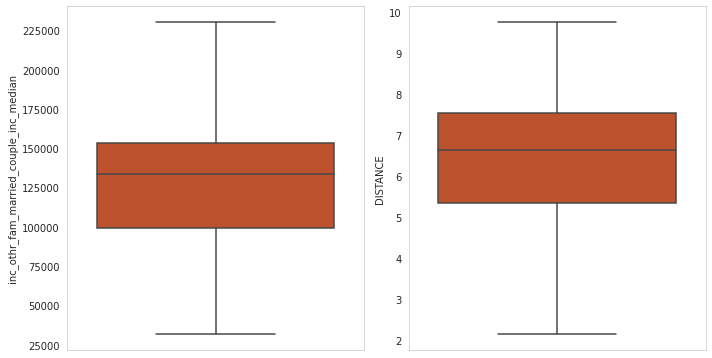

In [33]:
# Look at Boxplots for Numeric Data with Missing Values
bp_data = pd.DataFrame(df5[['inc_othr_fam_married_couple_inc_median', 'DISTANCE' ]])

cols = bp_data.columns

# Determine the size of the grid (number of rows, columns)
number_of_columns = 2 # number of charts to show per row
number_of_rows = round(((len(cols))/number_of_columns))

print('vars:' + str(len(cols)))
print('rows:' + str(number_of_rows))
print('cols:' + str(number_of_columns))

plt.figure(figsize=(10,10))

for i in range(len(cols)):
    sns.set_style('whitegrid', {'axes.grid' : False}) 
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_style('whitegrid', {'axes.grid' : False}) 
    sns.boxplot(y=bp_data[cols[i]],color='#D34817',orient='h')
    plt.tight_layout()

### Plug Null Values with Mean

The data is fairly normally distributed -- there is not much difference between Mean and Median

In [34]:
mean_dist = round(df5['DISTANCE'].mean(),2)
print('Mean Distance:' + str(mean_dist))

mean_inc = round(df5['inc_othr_fam_married_couple_inc_median'].mean())
print('Mean Income:' + str(mean_inc))

df5['DISTANCE'] = df5['DISTANCE'].replace(np.nan, mean_dist)
df5['inc_othr_fam_married_couple_inc_median'] = df5['inc_othr_fam_married_couple_inc_median'].replace(np.nan, mean_inc)

Mean Distance:6.46
Mean Income:132691


### Examine the Data After Dropping Rows and Plugging Null Values

In [35]:
colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df5.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df5.iloc[:,i].dtypes        # column type
  n_null = df5.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df5.iloc[:,i].unique()) # number unique
  n_rows = len(df5.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,AV_LAND,int64,19991,19991,2745,0
2,AV_BLDG,int64,19991,19991,5346,0
3,AV_TOTAL,int64,19991,19991,6213,0
4,LAND_SF,float64,19991,19991,6798,0
5,GROSS_AREA,int64,19991,19991,3916,0
6,LIVING_AREA,int64,19991,19991,2733,0
7,NUM_FLOORS,float64,19991,19991,6,0
8,STRUCTURE_CLASS,object,19991,19991,4,0
9,R_BLDG_STYL,object,19991,19991,17,0


# FULL EXPLORATORY DATA ANALYSIS

In [36]:
# Split DataFrame into Targets and NonTargets
tgts_df = df5[df5['Target']==1]
nontgts_df = df5[df5['Target']==0]

tgts_df.shape  
nontgts_df.shape  

(549, 121)

(19442, 121)

### Explore Categorical Variables

In [37]:
# Define List of Categorical Variables

catvars = ['NUM_FLOORS'
, 'STRUCTURE_CLASS'
, 'R_BLDG_STYL'
, 'R_ROOF_TYP'
, 'R_EXT_FIN'
, 'R_FULL_BTH'
, 'R_HALF_BTH'
, 'R_BTH_STYLE'
, 'R_BTH_STYLE2'
, 'R_KITCH'
, 'R_KITCH_STYLE'
, 'R_HEAT_TYP'
, 'R_AC'
, 'R_FPLACE'
, 'R_EXT_CND'
, 'R_OVRALL_CND'
, 'R_INT_CND'
, 'R_INT_FIN'
, 'REMODELED_EVER_FLAG'
, 'bi_flood'
, 'bi_stormwater'
, 'bi_num_bldgs'
]


>>> NUM_FLOORS 



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'NUM_FLOORS')

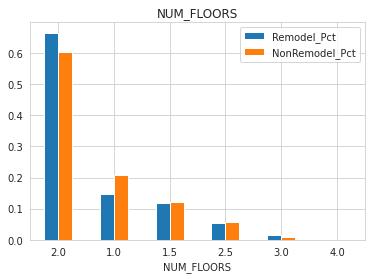

,NUM_FLOORS,Remodel_Pct,NonRemodel_Pct
0,2.00,0.66,0.60
1,1.00,0.15,0.21
2,1.50,0.12,0.12
3,2.50,0.05,0.06
4,3.00,0.01,0.01
5,4.00,NaN,0.00





>>> STRUCTURE_CLASS 



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0.5, 1.0, 'STRUCTURE_CLASS')

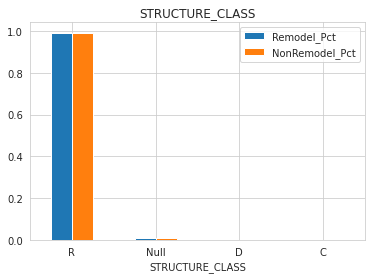

,STRUCTURE_CLASS,Remodel_Pct,NonRemodel_Pct
0,R,0.99,0.99
1,Null,0.01,0.01
2,D,NaN,0.00
3,C,NaN,0.00





>>> R_BLDG_STYL 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_BLDG_STYL')

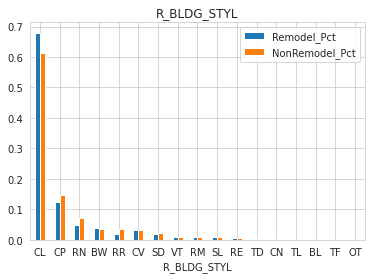

,R_BLDG_STYL,Remodel_Pct,NonRemodel_Pct
0,CL,0.68,0.61
1,CP,0.13,0.15
2,RN,0.05,0.07
3,BW,0.04,0.04
4,RR,0.02,0.03
5,CV,0.03,0.03
6,SD,0.02,0.02
7,VT,0.01,0.01
8,RM,0.01,0.01
9,SL,0.01,0.01





>>> R_ROOF_TYP 



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_ROOF_TYP')

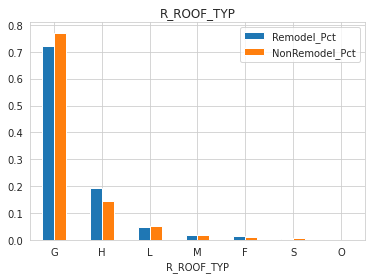

,R_ROOF_TYP,Remodel_Pct,NonRemodel_Pct
0,G,0.72,0.77
1,H,0.19,0.14
2,L,0.05,0.05
3,M,0.02,0.02
4,F,0.01,0.01
5,S,0.00,0.01
6,O,NaN,0.00





>>> R_EXT_FIN 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_EXT_FIN')

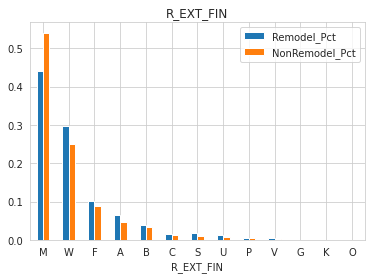

,R_EXT_FIN,Remodel_Pct,NonRemodel_Pct
0,M,0.44,0.54
1,W,0.30,0.25
2,F,0.10,0.09
3,A,0.07,0.05
4,B,0.04,0.03
5,C,0.01,0.01
6,S,0.02,0.01
7,U,0.01,0.01
8,P,0.01,0.01
9,V,0.00,0.00





>>> R_FULL_BTH 



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_FULL_BTH')

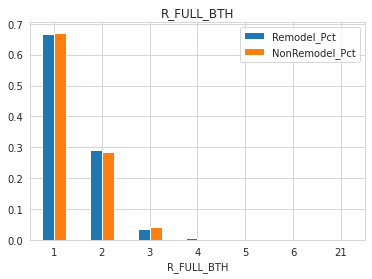

,R_FULL_BTH,Remodel_Pct,NonRemodel_Pct
0,1,0.67,0.67
1,2,0.29,0.28
2,3,0.04,0.04
3,4,0.01,0.00
4,5,NaN,0.00
5,6,NaN,0.00
6,21,NaN,0.00





>>> R_HALF_BTH 



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_HALF_BTH')

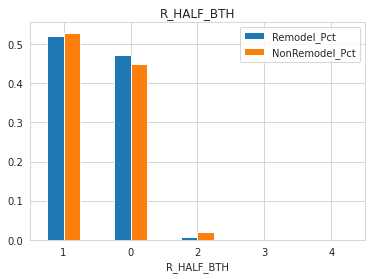

,R_HALF_BTH,Remodel_Pct,NonRemodel_Pct
0,1,0.52,0.53
1,0,0.47,0.45
2,2,0.01,0.02
3,3,NaN,0.00
4,4,NaN,0.00





>>> R_BTH_STYLE 



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_BTH_STYLE')

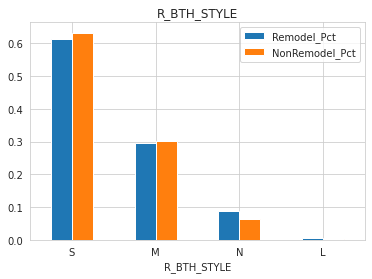

,R_BTH_STYLE,Remodel_Pct,NonRemodel_Pct
0,S,0.61,0.63
1,M,0.30,0.30
2,N,0.09,0.06
3,L,0.01,0.00





>>> R_BTH_STYLE2 



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_BTH_STYLE2')

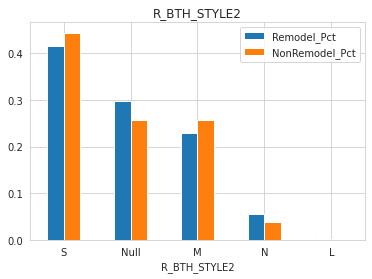

,R_BTH_STYLE2,Remodel_Pct,NonRemodel_Pct
0,S,0.42,0.44
1,Null,0.30,0.26
2,M,0.23,0.26
3,N,0.05,0.04
4,L,0.00,0.00





>>> R_KITCH 



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_KITCH')

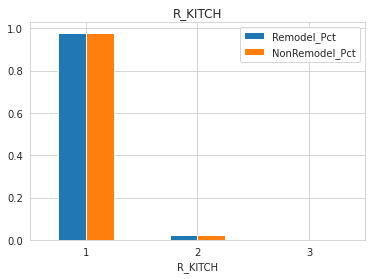

,R_KITCH,Remodel_Pct,NonRemodel_Pct
0,1,0.98,0.98
1,2,0.02,0.02
2,3,NaN,0.00





>>> R_KITCH_STYLE 



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_KITCH_STYLE')

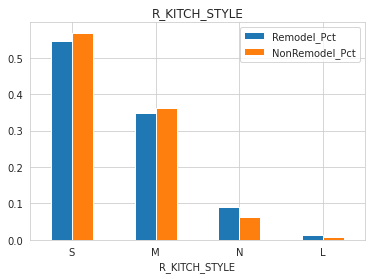

,R_KITCH_STYLE,Remodel_Pct,NonRemodel_Pct
0,S,0.55,0.57
1,M,0.35,0.36
2,N,0.09,0.06
3,L,0.01,0.01





>>> R_HEAT_TYP 



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_HEAT_TYP')

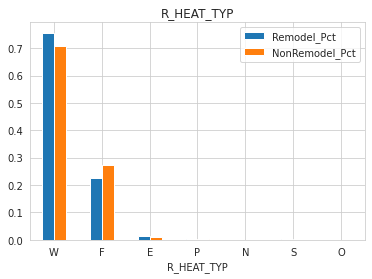

,R_HEAT_TYP,Remodel_Pct,NonRemodel_Pct
0,W,0.76,0.71
1,F,0.23,0.27
2,E,0.01,0.01
3,P,0.00,0.00
4,N,NaN,0.00
5,S,0.00,0.00
6,O,NaN,0.00





>>> R_AC 



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_AC')

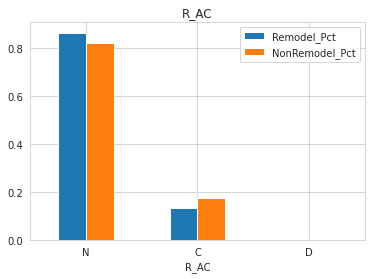

,R_AC,Remodel_Pct,NonRemodel_Pct
0,N,0.86,0.82
1,C,0.13,0.18
2,D,0.00,0.00





>>> R_FPLACE 



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_FPLACE')

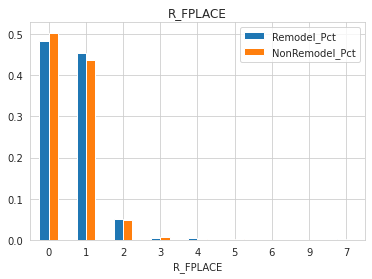

,R_FPLACE,Remodel_Pct,NonRemodel_Pct
0,0,0.48,0.50
1,1,0.46,0.44
2,2,0.05,0.05
3,3,0.01,0.01
4,4,0.00,0.00
5,5,NaN,0.00
6,6,NaN,0.00
7,9,NaN,0.00
8,7,0.00,NaN





>>> R_EXT_CND 



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_EXT_CND')

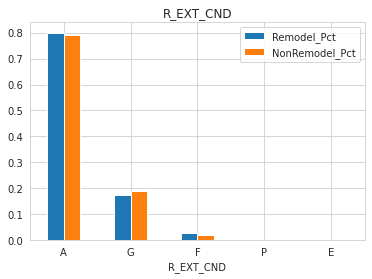

,R_EXT_CND,Remodel_Pct,NonRemodel_Pct
0,A,0.80,0.79
1,G,0.17,0.19
2,F,0.03,0.02
3,P,NaN,0.00
4,E,NaN,0.00





>>> R_OVRALL_CND 



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_OVRALL_CND')

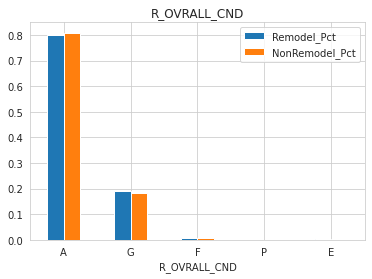

,R_OVRALL_CND,Remodel_Pct,NonRemodel_Pct
0,A,0.80,0.81
1,G,0.19,0.18
2,F,0.01,0.01
3,P,NaN,0.00
4,E,0.00,0.00





>>> R_INT_CND 



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_INT_CND')

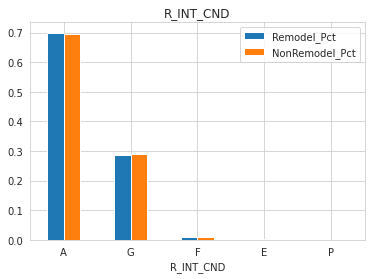

,R_INT_CND,Remodel_Pct,NonRemodel_Pct
0,A,0.70,0.70
1,G,0.29,0.29
2,F,0.01,0.01
3,E,0.00,0.00
4,P,NaN,0.00





>>> R_INT_FIN 



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_INT_FIN')

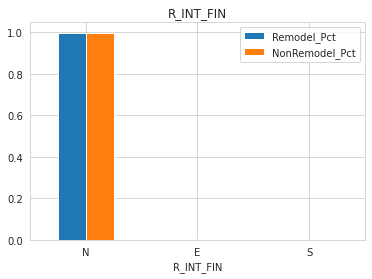

,R_INT_FIN,Remodel_Pct,NonRemodel_Pct
0,N,1.00,1.00
1,E,0.00,0.00
2,S,NaN,0.00





>>> REMODELED_EVER_FLAG 



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0.5, 1.0, 'REMODELED_EVER_FLAG')

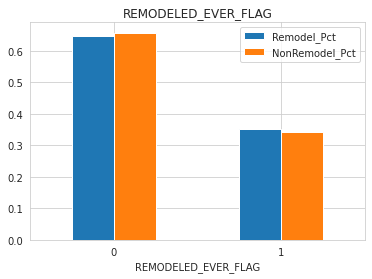

,REMODELED_EVER_FLAG,Remodel_Pct,NonRemodel_Pct
0,0,0.65,0.66
1,1,0.35,0.34





>>> bi_flood 



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0.5, 1.0, 'bi_flood')

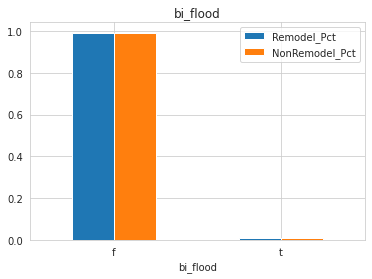

,bi_flood,Remodel_Pct,NonRemodel_Pct
0,f,0.99,0.99
1,t,0.01,0.01





>>> bi_stormwater 



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0.5, 1.0, 'bi_stormwater')

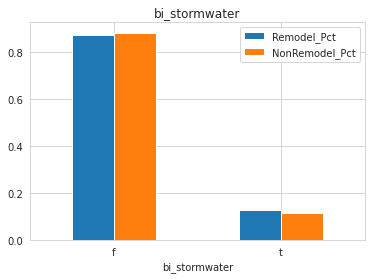

,bi_stormwater,Remodel_Pct,NonRemodel_Pct
0,f,0.87,0.88
1,t,0.13,0.12





>>> bi_num_bldgs 



(array([0]), <a list of 1 Text major ticklabel objects>)

Text(0.5, 1.0, 'bi_num_bldgs')

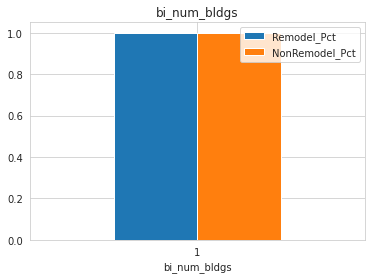

,bi_num_bldgs,Remodel_Pct,NonRemodel_Pct
0,1,1.00,1.00


In [38]:
# Output Side-by-Side Comparison Bar-Plots: Targets vs Non-Targets

for i in catvars: 
  # Create DF of Unique Values for Given Categorical Column
  univals = pd.DataFrame(df5[i].value_counts())
  univals = univals.reset_index()
  univals = pd.DataFrame(univals.iloc[:,0])
  univals.columns = [i] 

  # Get Proportions by Value for Target Population
  vartgts = pd.DataFrame(tgts_df[i].value_counts(normalize=True)) 
  vartgts = vartgts.reset_index() 
  vartgts.columns = [i,"Remodel_Pct" ]

  # Get Proportions by Value for NON-Target Population
  varnontgts = pd.DataFrame(nontgts_df[i].value_counts(normalize=True)) 
  varnontgts = varnontgts.reset_index() 
  varnontgts.columns = [i,"NonRemodel_Pct" ]
 
  # Add Proportions to DF of Unique Column Value
  univals = pd.merge(univals, vartgts,    left_on=i, right_on=i, how='left') 
  univals = pd.merge(univals, varnontgts, left_on=i, right_on=i, how='left') 


  print('\n>>>',i,'\n')
  uplot = univals.plot(x=i, kind= 'bar'  );
  plt.xticks(rotation=0);
  plt.grid(b=None);
  plt.title(i)  ;
  plt.show();
  univals
  print('\n\n===================================================================== ')


In [39]:
# Output Side-by-Side Comparison Distribution Tables: Targets vs Non-Targets

for i in catvars: 
  # Create DF of Unique Values for Given Categorical Column
  univals = pd.DataFrame(df5[i].value_counts())
  univals = univals.reset_index()
  univals = pd.DataFrame(univals.iloc[:,0])
  univals.columns = [i] 

  # Get Proportions by Value for Target Population
  vartgts = pd.DataFrame(tgts_df[i].value_counts(normalize=True)) 
  vartgts = vartgts.reset_index() 
  vartgts.columns = [i,"Remodel_Pct" ]

  # Get Proportions by Value for NON-Target Population
  varnontgts = pd.DataFrame(nontgts_df[i].value_counts(normalize=True)) 
  varnontgts = varnontgts.reset_index() 
  varnontgts.columns = [i,"NonRemodel_Pct" ]
 
  # Add Proportions to DF of Unique Column Value
  univals = pd.merge(univals, vartgts,    left_on=i, right_on=i, how='left') 
  univals = pd.merge(univals, varnontgts, left_on=i, right_on=i, how='left') 
  print('\n', univals, '\n\n===================================================================== ')



    NUM_FLOORS  Remodel_Pct  NonRemodel_Pct
0        2.00         0.66            0.60
1        1.00         0.15            0.21
2        1.50         0.12            0.12
3        2.50         0.05            0.06
4        3.00         0.01            0.01
5        4.00          NaN            0.00 


   STRUCTURE_CLASS  Remodel_Pct  NonRemodel_Pct
0               R         0.99            0.99
1            Null         0.01            0.01
2               D          NaN            0.00
3               C          NaN            0.00 


    R_BLDG_STYL  Remodel_Pct  NonRemodel_Pct
0           CL         0.68            0.61
1           CP         0.13            0.15
2           RN         0.05            0.07
3           BW         0.04            0.04
4           RR         0.02            0.03
5           CV         0.03            0.03
6           SD         0.02            0.02
7           VT         0.01            0.01
8           RM         0.01            0.01
9           SL


>>> R_BDRMS 



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

Text(0.5, 1.0, 'R_BDRMS')

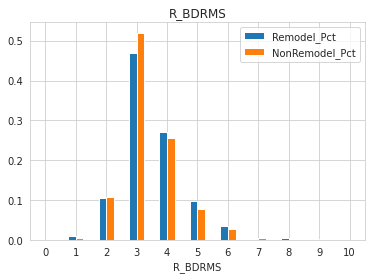

,R_BDRMS,Remodel_Pct,NonRemodel_Pct
10,0,NaN,0.00
6,1,0.01,0.00
2,2,0.11,0.11
0,3,0.47,0.52
1,4,0.27,0.26
3,5,0.10,0.08
4,6,0.03,0.03
5,7,0.00,0.01
7,8,0.01,0.00
8,9,0.00,0.00


In [40]:
# 'R_BDRMS' was formatted as numeric and I want the plot to be in value-order

catvars = ['R_BDRMS']

# Output Side-by-Side Comparison Bar-Plots: Targets vs Non-Targets

for i in catvars: 
  # Create DF of Unique Values for Given Categorical Column
  univals = pd.DataFrame(df5[i].value_counts())
  univals = univals.reset_index()
  univals = pd.DataFrame(univals.iloc[:,0])
  univals.columns = [i] 

  # Get Proportions by Value for Target Population
  vartgts = pd.DataFrame(tgts_df[i].value_counts(normalize=True)) 
  vartgts = vartgts.reset_index() 
  vartgts.columns = [i,"Remodel_Pct" ]

  # Get Proportions by Value for NON-Target Population
  varnontgts = pd.DataFrame(nontgts_df[i].value_counts(normalize=True)) 
  varnontgts = varnontgts.reset_index() 
  varnontgts.columns = [i,"NonRemodel_Pct" ]
 
  # Add Proportions to DF of Unique Column Value
  univals = pd.merge(univals, vartgts,    left_on=i, right_on=i, how='left') 
  univals = pd.merge(univals, varnontgts, left_on=i, right_on=i, how='left') 
  univals = univals.sort_values(by=[i])

  print('\n>>>',i,'\n')
  uplot = univals.plot(x=i, kind= 'bar'  );
  plt.xticks(rotation=0);
  plt.grid(b=None);
  plt.title(i)  ;
  plt.show();
  univals
  print('\n\n===================================================================== ')


### Explore Numeric/Continous Variables

In [41]:
numvars = [ 'AV_LAND'
, 'AV_BLDG'
, 'AV_TOTAL'
, 'LAND_SF'
, 'GROSS_AREA'
, 'LIVING_AREA'
, 'NUM_FLOORS'
, 'R_TOTAL_RMS'
, 'R_BDRMS'
, 'R_FULL_BTH'
, 'R_HALF_BTH'
, 'R_KITCH'
, 'R_FPLACE'
, 'inc_cnt_fam_married_couple_total'
, 'inc_pct_fam_married_couple_inc_lt_10000'
, 'inc_pct_fam_married_couple_inc_10000_14999'
, 'inc_pct_fam_married_couple_inc_15000_24999'
, 'inc_pct_fam_married_couple_inc_25000_34999'
, 'inc_pct_fam_married_couple_inc_35000_49999'
, 'inc_pct_fam_married_couple_inc_50000_74999'
, 'inc_pct_fam_married_couple_inc_75000_99999'
, 'inc_pct_fam_married_couple_inc_100000_149999'
, 'inc_pct_fam_married_couple_inc_150000_199999'
, 'inc_pct_fam_married_couple_inc_gt_200000'
, 'inc_othr_fam_married_couple_inc_median'
, 'inc_cnt_hh_non_fam_total'
, 'inc_pct_hh_non_fam_inc_lt_10000'
, 'inc_pct_hh_non_fam_inc_10000_14999'
, 'inc_pct_hh_non_fam_inc_15000_24999'
, 'inc_pct_hh_non_fam_inc_25000_34999'
, 'inc_pct_hh_non_fam_inc_35000_49999'
, 'inc_pct_hh_non_fam_inc_50000_74999'
, 'inc_pct_hh_non_fam_inc_75000_99999'
, 'inc_pct_hh_non_fam_inc_100000_149999'
, 'inc_pct_hh_non_fam_inc_150000_199999'
, 'inc_pct_hh_non_fam_inc_gt_200000'
, 'as_Cnt_Total_Population'
, 'as_Othr_Median_age_(years)'
, 'as_Ratio_Sex_ratio_(males_per_100_females)'
, 'as_Ratio_Age_dependency_ratio'
, 'as_Ratio_Old-age_dependency_ratio'
, 'as_Ratio_Child_dependency_ratio'
, 'as_Pct_Age_Under_5_years'
, 'as_Pct_Age_5_to_9_years'
, 'as_Pct_Age_10_to_14_years'
, 'as_Pct_Age_15_to_19_years'
, 'as_Pct_Age_20_to_24_years'
, 'as_Pct_Age_25_to_29_years'
, 'as_Pct_Age_30_to_34_years'
, 'as_Pct_Age_35_to_39_years'
, 'as_Pct_Age_40_to_44_years'
, 'as_Pct_Age_45_to_49_years'
, 'as_Pct_Age_50_to_54_years'
, 'as_Pct_Age_55_to_59_years'
, 'as_Pct_Age_60_to_64_years'
, 'as_Pct_Age_65_to_69_years'
, 'as_Pct_Age_70_to_74_years'
, 'as_Pct_Age_75_to_79_years'
, 'as_Pct_Age_80_to_84_years'
, 'as_Pct_Age_85_years_and_over'
, 'as_Pct_Age_5_to_14_years'
, 'as_Pct_Age_15_to_17_years'
, 'as_Pct_Age_Under_18_years'
, 'as_Pct_Age_18_to_24_years'
, 'as_Pct_Age_15_to_44_years'
, 'as_Pct_Age_16_years_and_over'
, 'as_Pct_Age_18_years_and_over'
, 'as_Pct_Age_21_years_and_over'
, 'as_Pct_Age_60_years_and_over'
, 'as_Pct_Age_62_years_and_over'
, 'as_Pct_Age_65_years_and_over'
, 'as_Pct_Age_75_years_and_over'
, 'as_Cnt_Male_Total_Population'
, 'as_Othr_Male_Age_Median_age_(years)'
, 'as_Cnt_Female_Total_Population'
, 'as_Othr_Female_Age_Median_age_(years)'
# , 'as_Pct_Female_Age_21_years_and_over'
, 'edu_Pct_Age_18to24_lt_high_school'
, 'edu_Pct_Age_18to24_high_school'
, 'edu_Pct_Age_18to24_some_college'
, 'edu_Pct_Age_18to24_bachelors'
, 'edu_Pct_Age_25_plus_lt_9th'
, 'edu_Pct_Age_25_plus_some_high_school'
, 'edu_Pct_Age_25_plus_high_school'
, 'edu_Pct_Age_25_plus_some_college'
, 'edu_Pct_Age_25_plus_associates'
, 'edu_Pct_Age_25_plus_bachelors'
, 'edu_Pct_Age_25_plus_grad_professional'
, 'edu_Pct_Age_25_plus_high_school_plus'
, 'edu_Pct_Age_25_plus_bachelors_plus'
, 'edu_Pct_Age_25to34_high_school_plus'
, 'edu_Pct_Age_25to34_bachelors_plus'
, 'edu_Pct_Age_35to44_high_school_plus'
, 'edu_Pct_Age_35to44_bachelors_plus'
, 'edu_Pct_Age_45to64_high_school_plus'
, 'edu_Pct_Age_45to64_bachelors_plus'
, 'edu_Pct_Age_65_plus_high_school_plus'
, 'edu_Pct_Age_65_plus_bachelors_plus'
, 'sale_price'
, 'DISTANCE'
, 'AGE_BUILT'
, 'AGE_REMODEL'
, 'AGE_SALE'
]


>>> AV_LAND 



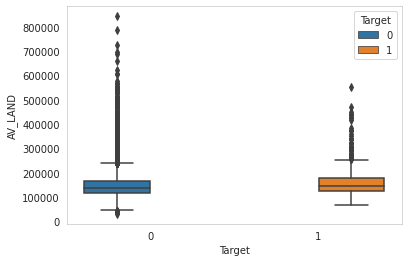

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,148786.96,53634.60,30500.00,117200.00,137300.00,165600.00,844400.00
1,549.00,162588.70,63799.91,66400.00,125600.00,145800.00,176900.00,554500.00





>>> AV_BLDG 



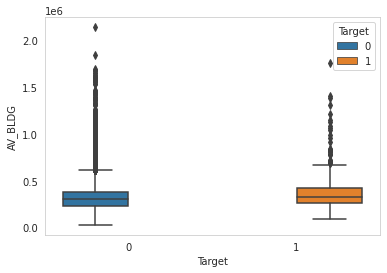

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,330834.61,149649.35,29000.00,232400.00,301000.00,384700.00,2143260.00
1,549.00,371979.70,185638.58,97400.00,262000.00,329100.00,426100.00,1759200.00





>>> AV_TOTAL 



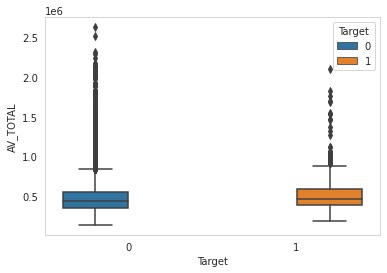

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,479621.57,193286.09,140500.00,354700.00,437900.00,549300.00,2629620.00
1,549.00,534568.40,237992.33,188800.00,395400.00,472800.00,598600.00,2098400.00





>>> LAND_SF 



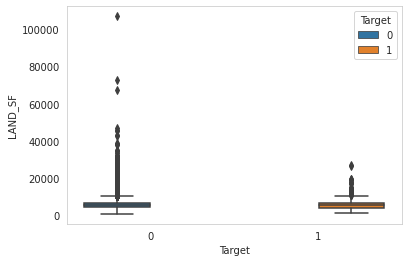

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5817.55,3005.90,605.00,4125.00,5198.00,6639.75,107158.00
1,549.00,5798.68,2998.42,1068.00,4000.00,5155.00,6600.00,26836.00





>>> GROSS_AREA 



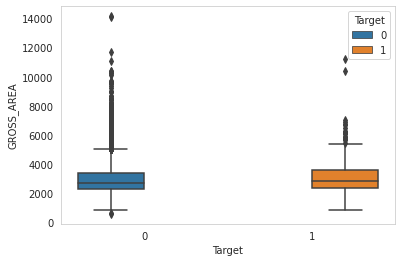

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2973.34,985.80,570.00,2313.00,2724.00,3396.00,14159.00
1,549.00,3080.21,1080.39,821.00,2340.00,2816.00,3576.00,11235.00





>>> LIVING_AREA 



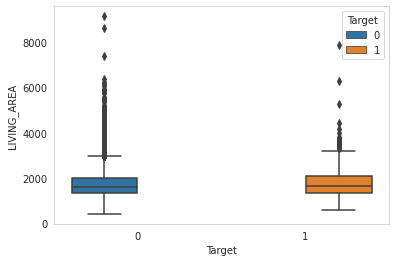

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1717.21,613.70,403.00,1313.00,1587.00,1974.75,9161.00
1,549.00,1783.96,705.45,575.00,1332.00,1622.00,2085.00,7882.00





>>> NUM_FLOORS 



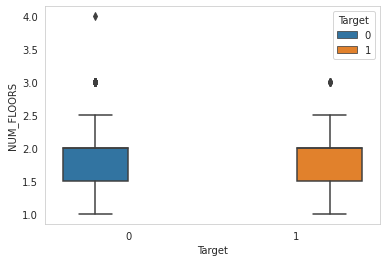

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1.77,0.46,1.00,1.50,2.00,2.00,4.00
1,549.00,1.84,0.42,1.00,1.50,2.00,2.00,3.00





>>> R_TOTAL_RMS 



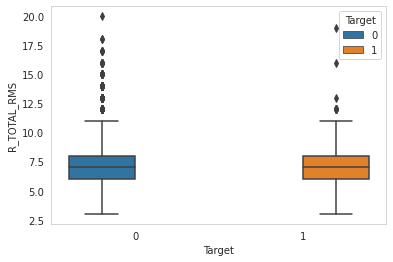

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,7.23,1.66,3.00,6.00,7.00,8.00,20.00
1,549.00,7.43,1.80,3.00,6.00,7.00,8.00,19.00





>>> R_BDRMS 



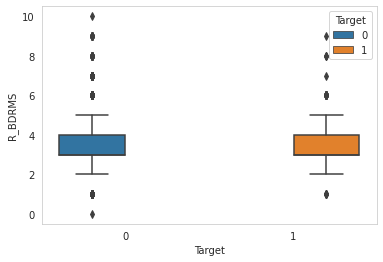

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,3.41,0.96,0.00,3.00,3.00,4.00,10.00
1,549.00,3.49,1.06,1.00,3.00,3.00,4.00,9.00





>>> R_FULL_BTH 



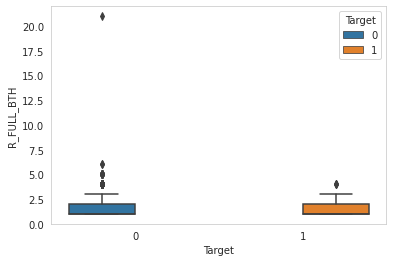

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1.38,0.61,1.00,1.00,1.00,2.00,21.00
1,549.00,1.38,0.58,1.00,1.00,1.00,2.00,4.00





>>> R_HALF_BTH 



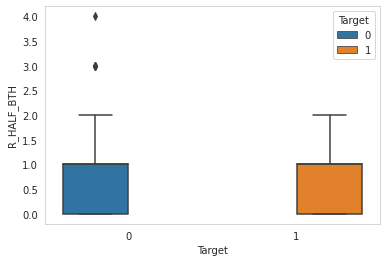

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,0.57,0.54,0.00,0.00,1.00,1.00,4.00
1,549.00,0.54,0.51,0.00,0.00,1.00,1.00,2.00





>>> R_KITCH 



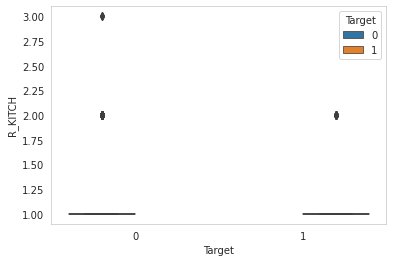

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1.02,0.14,1.00,1.00,1.00,1.00,3.00
1,549.00,1.02,0.15,1.00,1.00,1.00,1.00,2.00





>>> R_FPLACE 



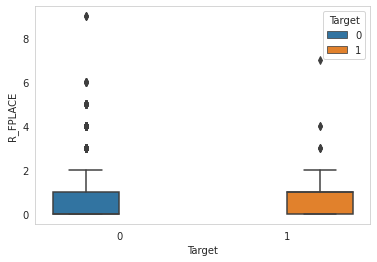

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,0.57,0.67,0.00,0.00,0.00,1.00,9.00
1,549.00,0.60,0.70,0.00,0.00,1.00,1.00,7.00





>>> inc_cnt_fam_married_couple_total 



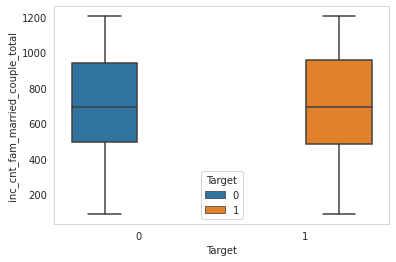

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,727.20,281.58,91.00,494.00,693.00,940.00,1204.00
1,549.00,729.72,287.18,91.00,486.00,693.00,955.00,1204.00





>>> inc_pct_fam_married_couple_inc_lt_10000 



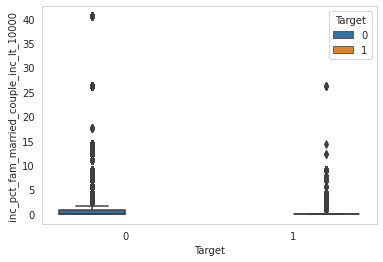

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1.22,3.12,0.00,0.00,0.00,0.90,40.50
1,549.00,1.32,3.34,0.00,0.00,0.00,0.00,26.30





>>> inc_pct_fam_married_couple_inc_10000_14999 



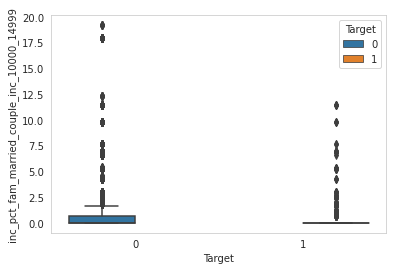

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,0.85,2.21,0.00,0.00,0.00,0.70,19.20
1,549.00,0.65,1.79,0.00,0.00,0.00,0.00,11.50





>>> inc_pct_fam_married_couple_inc_15000_24999 



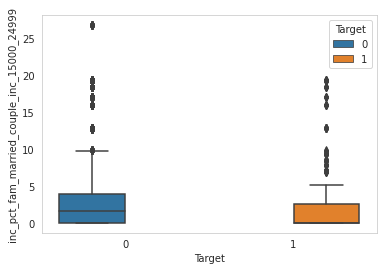

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2.74,4.03,0.00,0.00,1.60,3.90,26.80
1,549.00,2.55,4.44,0.00,0.00,0.00,2.60,19.40





>>> inc_pct_fam_married_couple_inc_25000_34999 



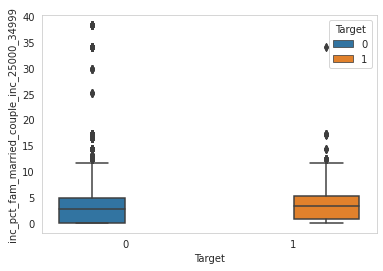

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,3.68,4.59,0.00,0.00,2.70,4.90,38.30
1,549.00,3.97,4.37,0.00,0.80,3.30,5.30,34.10





>>> inc_pct_fam_married_couple_inc_35000_49999 



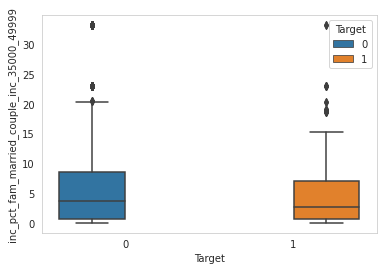

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,4.95,5.33,0.00,0.70,3.70,8.60,33.30
1,549.00,4.56,5.40,0.00,0.60,2.60,7.10,33.30





>>> inc_pct_fam_married_couple_inc_50000_74999 



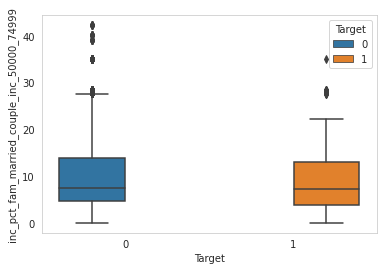

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,10.28,7.23,0.00,4.70,7.40,13.90,42.30
1,549.00,8.46,6.34,0.00,3.90,7.20,13.10,35.00





>>> inc_pct_fam_married_couple_inc_75000_99999 



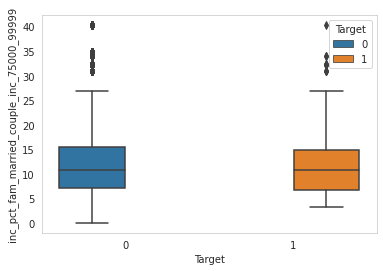

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,12.22,6.76,0.00,7.20,10.80,15.50,40.30
1,549.00,11.13,6.33,3.20,6.80,10.70,14.90,40.30





>>> inc_pct_fam_married_couple_inc_100000_149999 



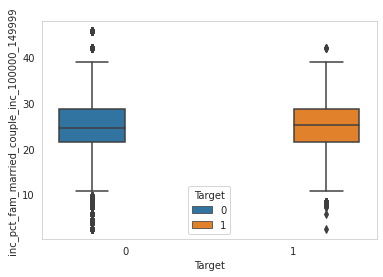

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,23.96,7.30,2.50,21.40,24.60,28.70,45.60
1,549.00,24.19,7.21,2.50,21.40,25.20,28.70,42.00





>>> inc_pct_fam_married_couple_inc_150000_199999 



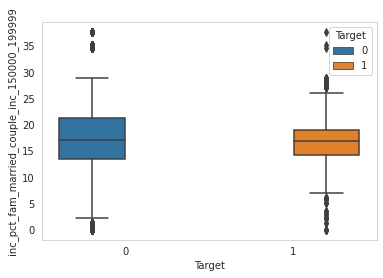

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,17.03,7.13,0.00,13.50,17.20,21.40,37.70
1,549.00,16.72,6.30,0.00,14.20,16.90,19.10,37.70





>>> inc_pct_fam_married_couple_inc_gt_200000 



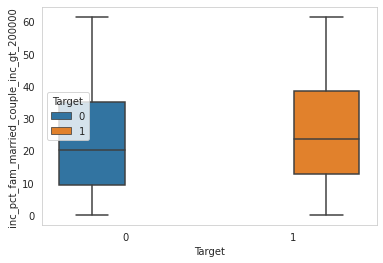

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,23.09,15.57,0.00,9.40,20.00,35.10,61.30
1,549.00,26.44,16.54,0.00,12.60,23.50,38.50,61.30





>>> inc_othr_fam_married_couple_inc_median 



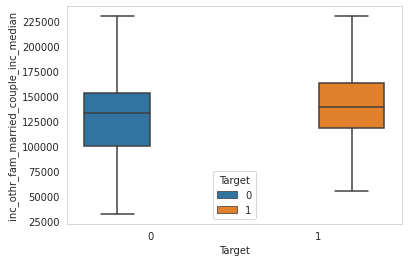

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,132460.97,37123.81,31887.00,99576.00,133682.00,153667.00,230357.00
1,549.00,140851.87,38937.00,54926.00,117656.00,138947.00,163553.00,230357.00





>>> inc_cnt_hh_non_fam_total 



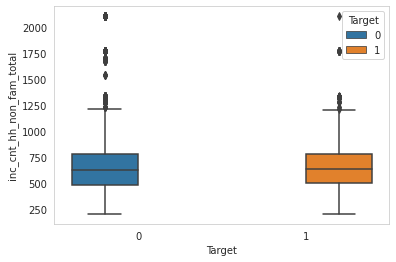

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,677.41,285.00,207.00,487.00,624.00,779.00,2101.00
1,549.00,706.19,316.95,207.00,499.00,637.00,779.00,2101.00





>>> inc_pct_hh_non_fam_inc_lt_10000 



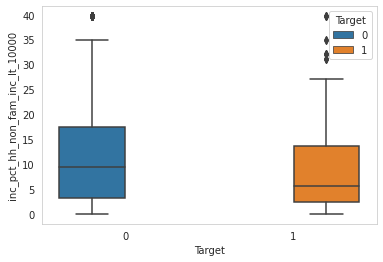

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,10.59,8.37,0.00,3.10,9.40,17.40,39.70
1,549.00,8.88,8.08,0.00,2.30,5.60,13.60,39.70





>>> inc_pct_hh_non_fam_inc_10000_14999 



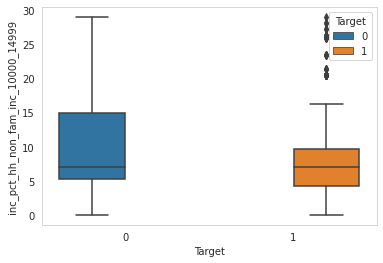

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,9.67,7.30,0.00,5.20,7.00,15.00,29.00
1,549.00,8.43,6.75,0.00,4.30,7.00,9.70,29.00





>>> inc_pct_hh_non_fam_inc_15000_24999 



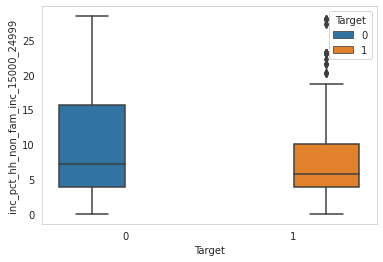

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,9.55,7.10,0.00,3.80,7.20,15.70,28.40
1,549.00,8.08,6.20,0.00,3.80,5.70,10.10,28.00





>>> inc_pct_hh_non_fam_inc_25000_34999 



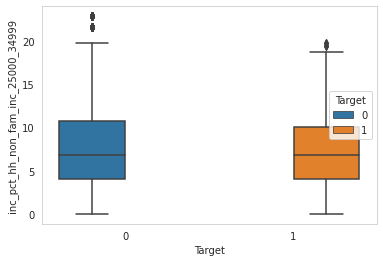

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,8.16,5.22,0.00,4.00,6.80,10.80,22.90
1,549.00,8.06,5.44,0.00,4.00,6.80,10.10,19.80





>>> inc_pct_hh_non_fam_inc_35000_49999 



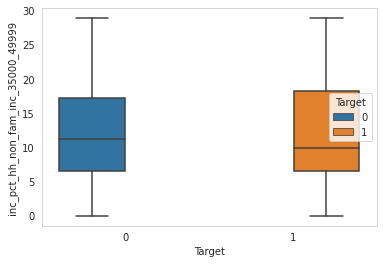

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,11.97,7.46,0.00,6.60,11.20,17.20,28.90
1,549.00,11.55,6.95,0.00,6.50,10.00,18.20,28.90





>>> inc_pct_hh_non_fam_inc_50000_74999 



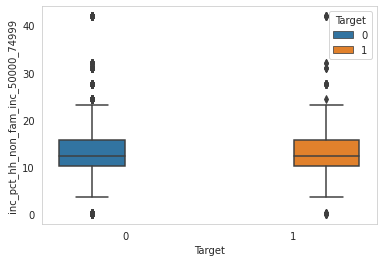

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,13.36,6.38,0.00,10.10,12.20,15.70,42.00
1,549.00,13.51,6.42,0.00,10.20,12.20,15.70,42.00





>>> inc_pct_hh_non_fam_inc_75000_99999 



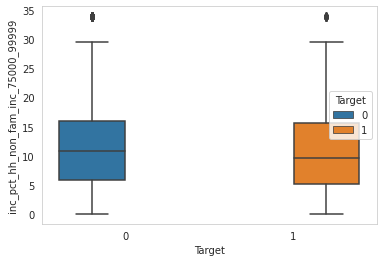

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,12.32,8.18,0.00,5.80,10.90,16.00,34.00
1,549.00,11.66,7.45,0.00,5.20,9.70,15.60,34.00





>>> inc_pct_hh_non_fam_inc_100000_149999 



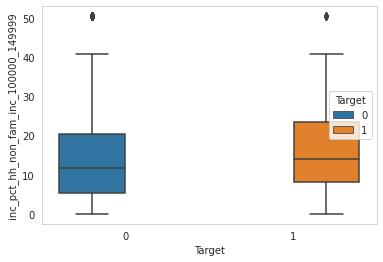

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,13.55,10.01,0.00,5.30,11.80,20.30,50.50
1,549.00,16.07,9.99,0.00,8.10,14.10,23.60,50.50





>>> inc_pct_hh_non_fam_inc_150000_199999 



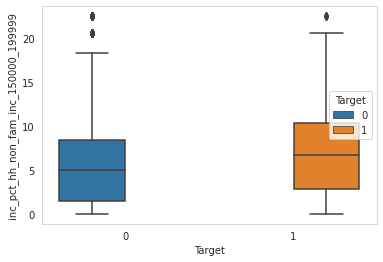

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.65,5.21,0.00,1.50,5.00,8.40,22.50
1,549.00,7.21,5.85,0.00,2.80,6.70,10.40,22.50





>>> inc_pct_hh_non_fam_inc_gt_200000 



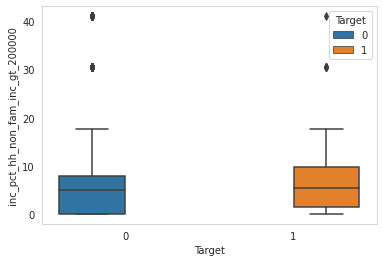

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.19,5.44,0.00,0.00,4.90,7.80,41.10
1,549.00,6.52,5.87,0.00,1.40,5.30,9.80,41.10





>>> as_Cnt_Total_Population 



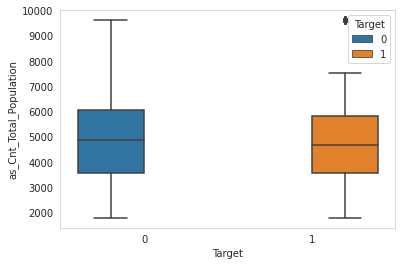

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5005.77,1745.06,1784.00,3553.00,4890.00,6081.00,9621.00
1,549.00,4749.32,1622.89,1784.00,3553.00,4674.00,5817.00,9621.00





>>> as_Othr_Median_age_(years) 



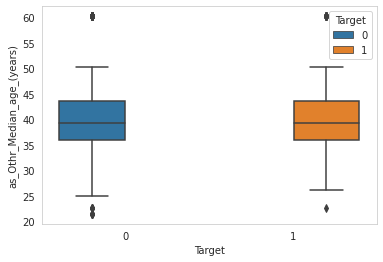

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,39.76,6.22,21.50,36.00,39.30,43.70,60.20
1,549.00,39.75,6.33,22.60,36.00,39.30,43.70,60.20





>>> as_Ratio_Sex_ratio_(males_per_100_females) 



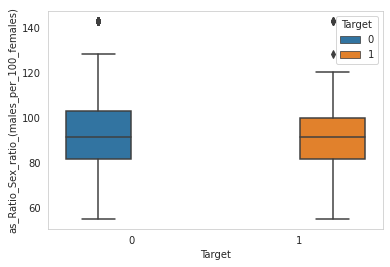

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,91.52,13.75,55.20,81.70,91.50,102.90,142.80
1,549.00,90.56,13.70,55.20,81.70,91.50,100.10,142.80





>>> as_Ratio_Age_dependency_ratio 



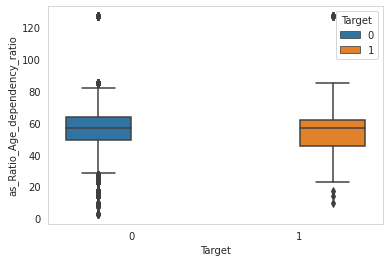

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,58.01,18.38,2.90,48.90,56.70,63.30,126.70
1,549.00,56.27,18.76,9.70,45.30,56.70,62.00,126.70





>>> as_Ratio_Old-age_dependency_ratio 



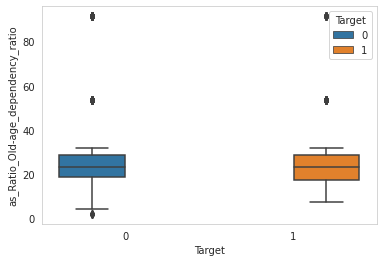

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,26.08,15.05,1.80,18.70,23.20,28.50,91.50
1,549.00,26.13,15.27,7.40,17.10,23.20,28.50,91.50





>>> as_Ratio_Child_dependency_ratio 



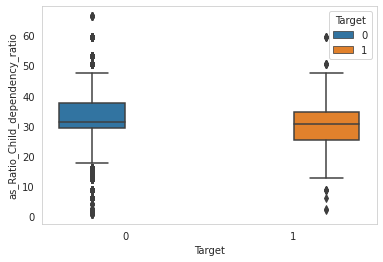

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,31.92,8.92,0.70,29.10,31.30,37.40,66.40
1,549.00,30.12,8.38,2.10,25.40,30.70,34.70,59.60





>>> as_Pct_Age_Under_5_years 



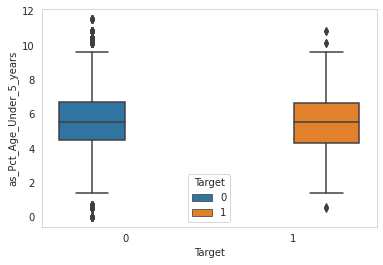

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.81,1.79,0.00,4.50,5.50,6.70,11.50
1,549.00,5.79,1.85,0.50,4.30,5.50,6.60,10.80





>>> as_Pct_Age_5_to_9_years 



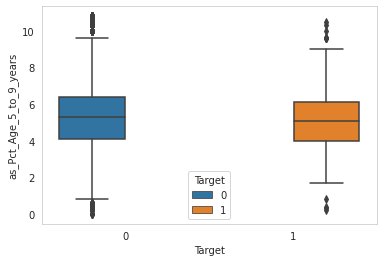

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.45,1.96,0.00,4.10,5.30,6.40,10.80
1,549.00,5.19,1.88,0.20,4.00,5.10,6.10,10.50





>>> as_Pct_Age_10_to_14_years 



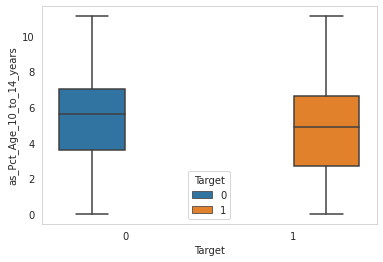

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.41,2.54,0.00,3.60,5.60,7.00,11.10
1,549.00,4.85,2.51,0.00,2.70,4.90,6.60,11.10





>>> as_Pct_Age_15_to_19_years 



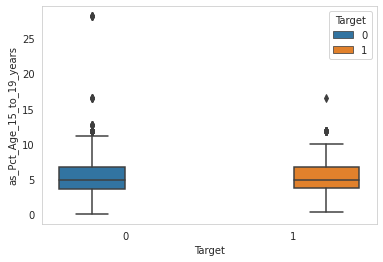

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.25,2.55,0.10,3.70,4.90,6.80,28.10
1,549.00,5.34,2.58,0.40,3.80,4.90,6.80,16.50





>>> as_Pct_Age_20_to_24_years 



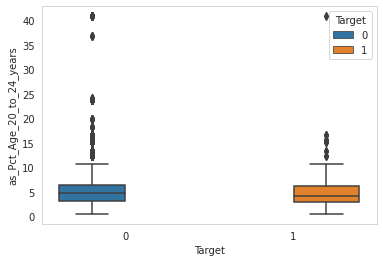

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.20,3.29,0.50,3.10,4.80,6.40,40.90
1,549.00,4.95,3.65,0.50,2.90,4.20,6.30,40.90





>>> as_Pct_Age_25_to_29_years 



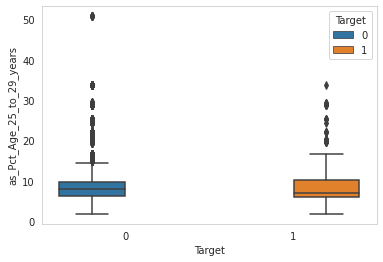

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,8.84,4.93,1.80,6.20,8.00,9.60,50.80
1,549.00,9.04,5.36,1.80,6.00,7.10,10.30,33.80





>>> as_Pct_Age_30_to_34_years 



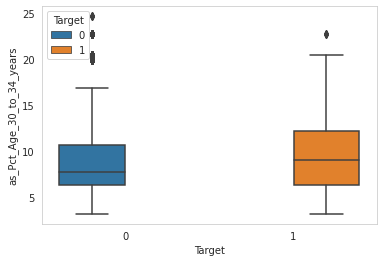

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,8.51,3.30,3.20,6.30,7.80,10.70,24.70
1,549.00,9.27,3.48,3.20,6.30,9.10,12.20,22.80





>>> as_Pct_Age_35_to_39_years 



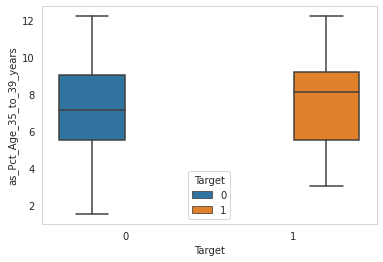

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,7.31,2.19,1.50,5.50,7.10,9.00,12.20
1,549.00,7.49,2.27,3.00,5.50,8.10,9.20,12.20





>>> as_Pct_Age_40_to_44_years 



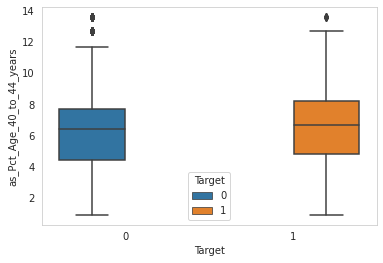

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.30,2.24,0.90,4.40,6.40,7.70,13.60
1,549.00,6.54,2.39,0.90,4.80,6.70,8.20,13.60





>>> as_Pct_Age_45_to_49_years 



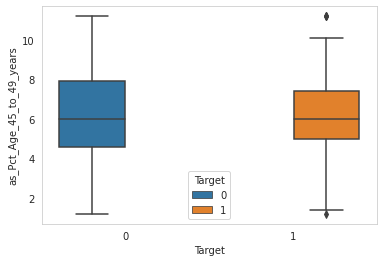

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.31,1.94,1.20,4.60,6.00,7.90,11.20
1,549.00,6.13,1.91,1.20,5.00,6.00,7.40,11.20





>>> as_Pct_Age_50_to_54_years 



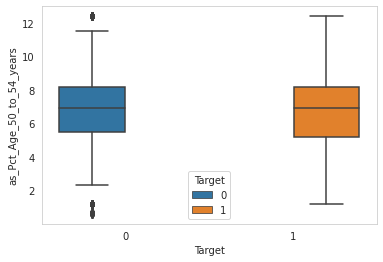

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.87,2.18,0.60,5.50,6.90,8.20,12.40
1,549.00,6.79,2.22,1.20,5.20,6.90,8.20,12.40





>>> as_Pct_Age_55_to_59_years 



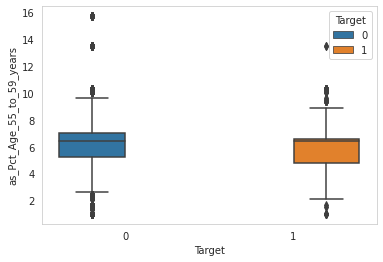

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.26,2.05,1.00,5.20,6.40,7.00,15.70
1,549.00,6.11,2.03,1.00,4.80,6.40,6.60,13.50





>>> as_Pct_Age_60_to_64_years 



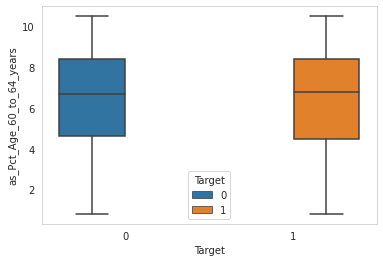

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.57,2.42,0.80,4.60,6.70,8.40,10.50
1,549.00,6.46,2.44,0.80,4.50,6.80,8.40,10.50





>>> as_Pct_Age_65_to_69_years 



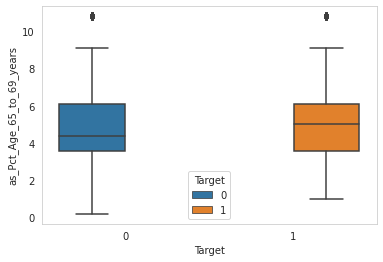

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,4.90,2.09,0.20,3.60,4.40,6.10,10.80
1,549.00,5.08,2.25,1.00,3.60,5.00,6.10,10.80





>>> as_Pct_Age_70_to_74_years 



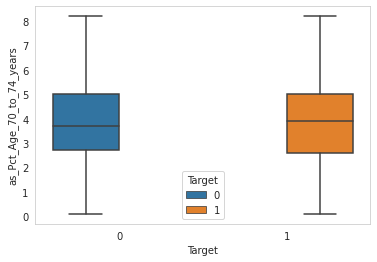

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,3.95,1.59,0.10,2.70,3.70,5.00,8.20
1,549.00,4.08,1.76,0.10,2.60,3.90,5.00,8.20





>>> as_Pct_Age_75_to_79_years 



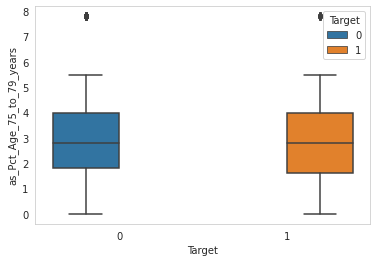

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2.90,1.74,0.00,1.80,2.80,4.00,7.80
1,549.00,2.84,1.72,0.00,1.60,2.80,4.00,7.80





>>> as_Pct_Age_80_to_84_years 



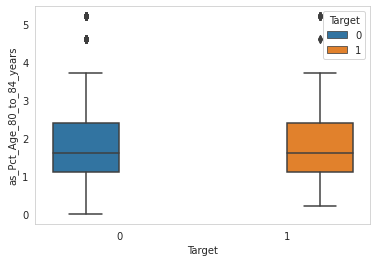

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,1.85,1.09,0.00,1.10,1.60,2.40,5.20
1,549.00,1.76,1.10,0.20,1.10,1.60,2.40,5.20





>>> as_Pct_Age_85_years_and_over 



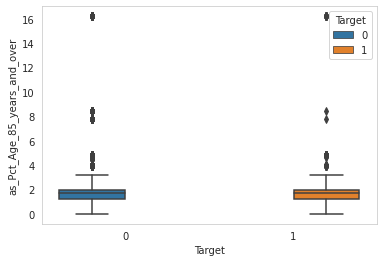

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2.33,2.95,0.00,1.20,1.70,2.00,16.20
1,549.00,2.33,2.79,0.00,1.20,1.70,2.00,16.20





>>> as_Pct_Age_5_to_14_years 



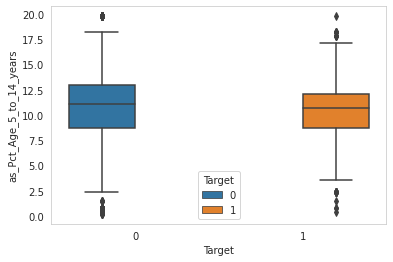

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,10.86,3.65,0.20,8.70,11.10,13.00,19.80
1,549.00,10.03,3.50,0.40,8.70,10.70,12.10,19.80





>>> as_Pct_Age_15_to_17_years 



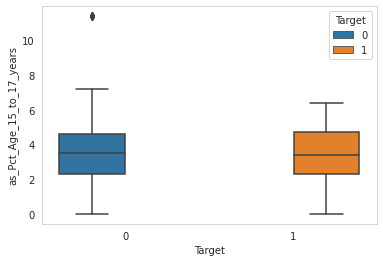

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,3.37,1.63,0.00,2.30,3.50,4.60,11.40
1,549.00,3.30,1.58,0.00,2.30,3.40,4.70,6.40





>>> as_Pct_Age_Under_18_years 



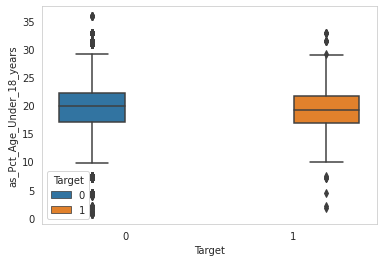

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,20.03,4.77,0.70,17.00,19.90,22.20,35.80
1,549.00,19.11,4.52,1.80,16.90,19.20,21.70,32.80





>>> as_Pct_Age_18_to_24_years 



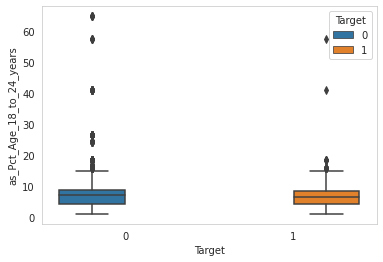

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,7.08,3.85,1.00,4.20,7.10,8.80,64.70
1,549.00,6.98,4.24,1.00,4.20,6.50,8.50,57.40





>>> as_Pct_Age_15_to_44_years 



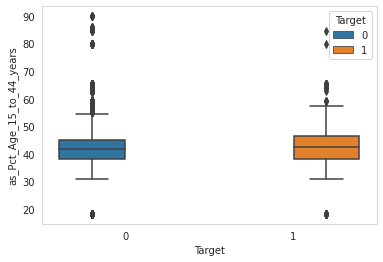

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,41.41,8.75,18.20,38.10,41.60,44.90,89.90
1,549.00,42.61,9.15,18.20,38.10,42.40,46.40,84.40





>>> as_Pct_Age_16_years_and_over 



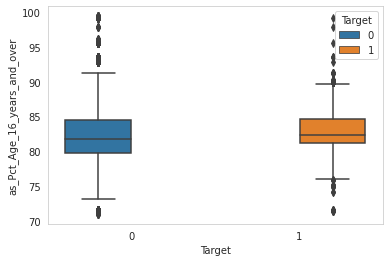

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,82.13,4.25,71.00,79.80,81.80,84.50,99.40
1,549.00,82.91,4.10,71.40,81.20,82.40,84.70,99.10





>>> as_Pct_Age_18_years_and_over 



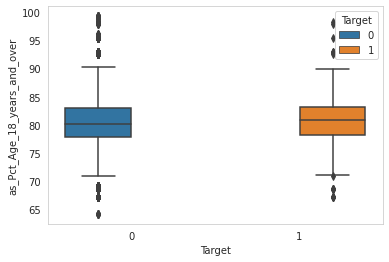

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,79.97,4.77,64.20,77.80,80.10,83.00,99.30
1,549.00,80.89,4.52,67.20,78.30,80.80,83.10,98.20





>>> as_Pct_Age_21_years_and_over 



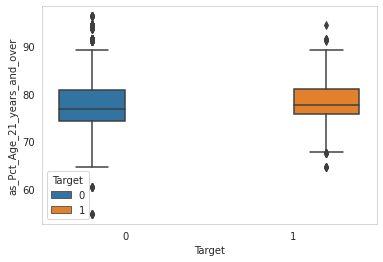

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,77.33,5.28,54.90,74.30,76.80,80.80,96.20
1,549.00,78.15,4.86,64.80,75.70,77.70,81.10,94.40





>>> as_Pct_Age_60_years_and_over 



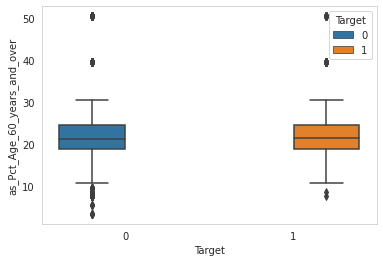

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,22.48,7.80,3.30,18.70,21.20,24.60,50.50
1,549.00,22.53,8.05,7.60,18.70,21.40,24.60,50.50





>>> as_Pct_Age_62_years_and_over 



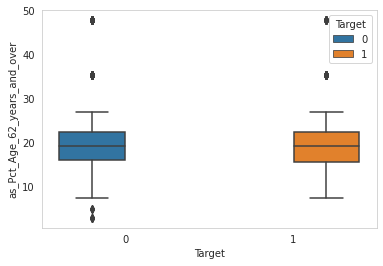

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,19.84,7.31,2.70,15.90,19.20,22.40,47.80
1,549.00,19.97,7.60,7.20,15.40,19.20,22.40,47.80





>>> as_Pct_Age_65_years_and_over 



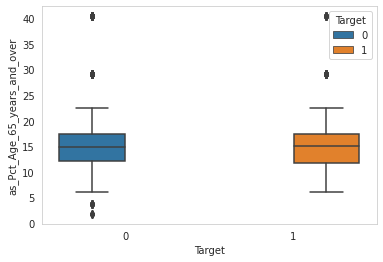

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,15.92,6.28,1.80,12.20,14.90,17.40,40.40
1,549.00,16.08,6.52,6.10,11.80,15.10,17.40,40.40





>>> as_Pct_Age_75_years_and_over 



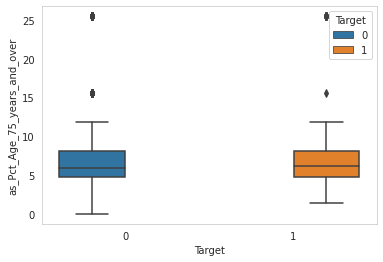

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,7.08,4.40,0.00,4.70,5.90,8.10,25.50
1,549.00,6.92,4.21,1.40,4.70,6.20,8.10,25.50





>>> as_Cnt_Male_Total_Population 



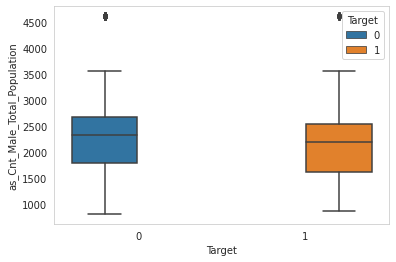

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2377.54,846.53,812.00,1789.00,2336.00,2680.00,4622.00
1,549.00,2246.28,784.49,860.00,1620.00,2207.00,2548.00,4622.00





>>> as_Othr_Male_Age_Median_age_(years) 



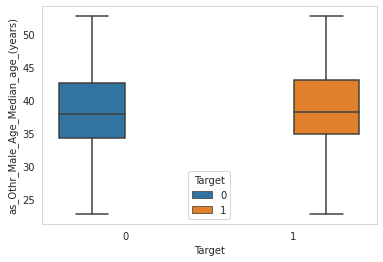

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,38.24,6.52,22.70,34.20,37.90,42.60,52.70
1,549.00,38.54,6.50,22.70,34.80,38.10,43.00,52.70





>>> as_Cnt_Female_Total_Population 



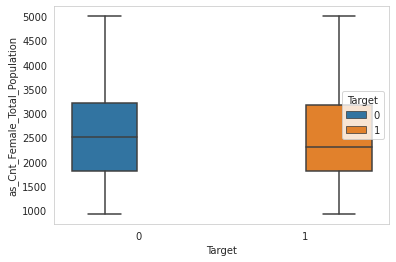

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,2628.23,940.41,924.00,1816.00,2504.00,3202.00,4999.00
1,549.00,2503.04,878.93,924.00,1816.00,2302.00,3173.00,4999.00





>>> as_Othr_Female_Age_Median_age_(years) 



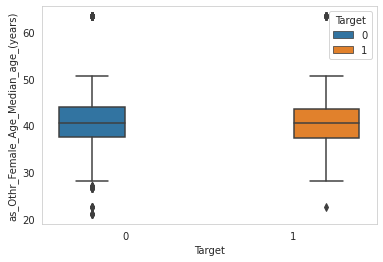

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,40.96,6.44,21.10,37.60,40.60,44.00,63.40
1,549.00,40.42,6.55,22.50,37.40,40.60,43.60,63.40





>>> edu_Pct_Age_18to24_lt_high_school 



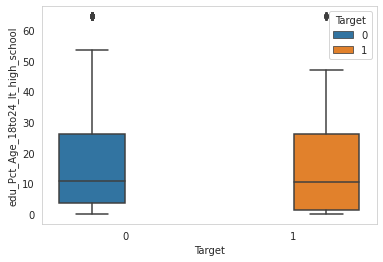

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,15.26,14.71,0.00,3.60,10.90,26.00,64.60
1,549.00,14.59,14.51,0.00,1.30,10.40,26.00,64.60





>>> edu_Pct_Age_18to24_high_school 



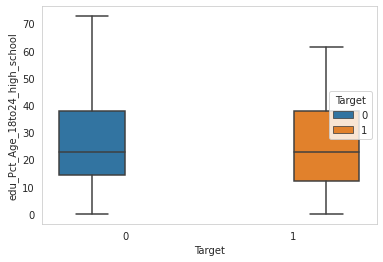

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,25.92,17.07,0.00,14.40,22.80,37.80,72.70
1,549.00,24.42,16.88,0.00,12.00,22.80,37.80,61.50





>>> edu_Pct_Age_18to24_some_college 



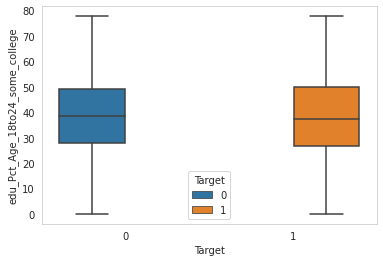

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,38.23,15.38,0.00,27.90,38.40,49.10,77.80
1,549.00,37.50,17.09,0.00,26.80,37.40,50.10,77.80





>>> edu_Pct_Age_18to24_bachelors 



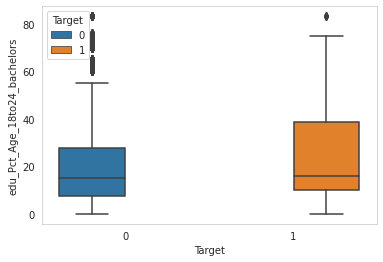

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,20.59,18.20,0.00,7.50,15.00,27.80,83.20
1,549.00,23.50,19.68,0.00,10.00,16.00,38.70,83.20





>>> edu_Pct_Age_25_plus_lt_9th 



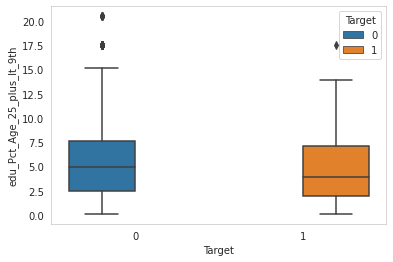

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,5.40,3.37,0.10,2.50,4.90,7.60,20.50
1,549.00,4.66,3.44,0.10,1.90,3.90,7.10,17.50





>>> edu_Pct_Age_25_plus_some_high_school 



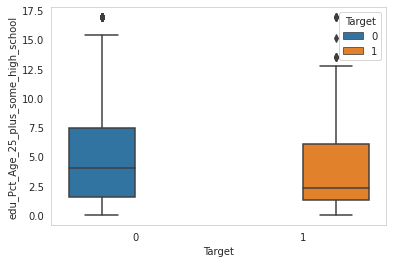

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,4.90,3.69,0.00,1.50,4.00,7.40,16.90
1,549.00,4.04,3.59,0.00,1.30,2.30,6.10,16.90





>>> edu_Pct_Age_25_plus_high_school 



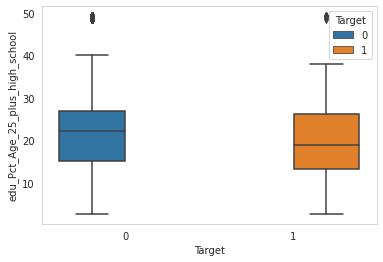

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,21.59,8.20,2.70,15.20,22.30,27.00,49.20
1,549.00,19.57,8.31,2.70,13.30,19.00,26.20,49.20





>>> edu_Pct_Age_25_plus_some_college 



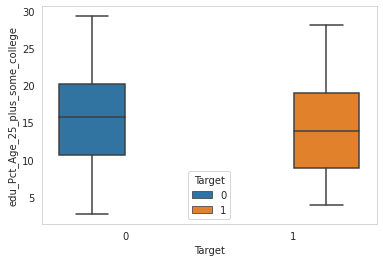

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,16.19,6.07,2.70,10.60,15.80,20.20,29.30
1,549.00,14.49,5.97,3.90,8.90,13.90,19.00,28.10





>>> edu_Pct_Age_25_plus_associates 



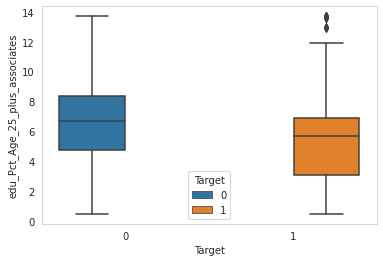

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.58,2.91,0.50,4.80,6.70,8.40,13.70
1,549.00,5.61,2.77,0.50,3.10,5.70,6.90,13.70





>>> edu_Pct_Age_25_plus_bachelors 



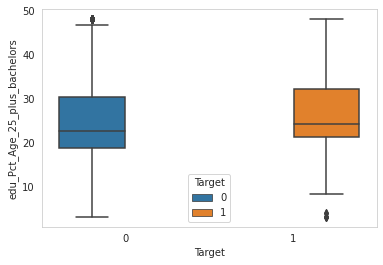

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,23.62,8.43,3.20,18.90,22.80,30.50,48.10
1,549.00,25.34,8.16,3.20,21.40,24.20,32.20,48.10





>>> edu_Pct_Age_25_plus_grad_professional 



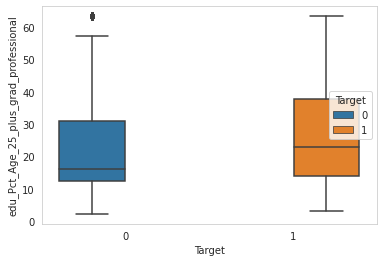

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,21.72,13.19,2.30,12.60,16.20,31.10,63.40
1,549.00,26.27,14.33,3.20,13.90,23.10,37.90,63.40





>>> edu_Pct_Age_25_plus_high_school_plus 



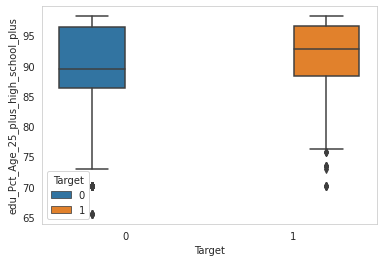

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,89.70,6.39,65.50,86.40,89.40,96.40,98.20
1,549.00,91.30,6.42,70.10,88.30,92.80,96.60,98.20





>>> edu_Pct_Age_25_plus_bachelors_plus 



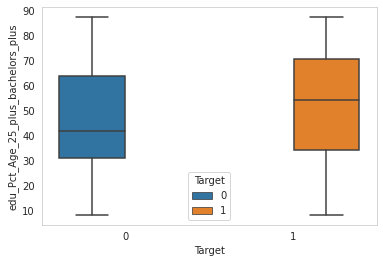

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,45.34,19.42,8.30,31.20,42.00,63.90,87.40
1,549.00,51.61,19.74,8.30,34.10,54.20,70.60,87.40





>>> edu_Pct_Age_25to34_high_school_plus 



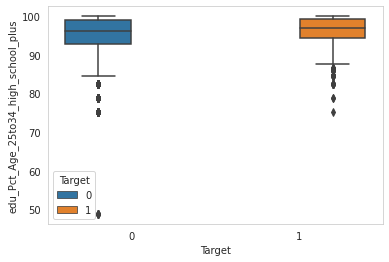

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,94.72,5.30,48.80,92.90,96.10,98.90,100.00
1,549.00,95.88,4.62,75.30,94.30,96.90,99.30,100.00





>>> edu_Pct_Age_25to34_bachelors_plus 



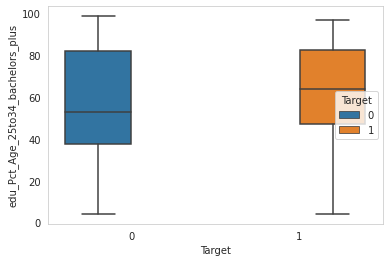

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,56.80,23.13,4.10,37.70,52.80,82.00,98.70
1,549.00,63.71,22.77,4.10,47.10,64.10,82.40,97.00





>>> edu_Pct_Age_35to44_high_school_plus 



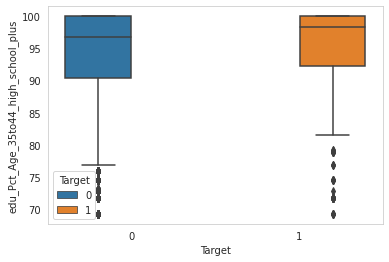

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,93.54,8.25,69.30,90.40,96.80,100.00,100.00
1,549.00,95.25,7.52,69.30,92.30,98.40,100.00,100.00





>>> edu_Pct_Age_35to44_bachelors_plus 



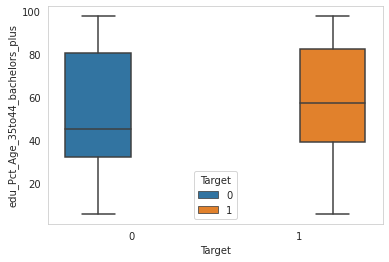

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,53.31,25.08,5.60,32.10,45.00,80.30,97.60
1,549.00,59.19,24.87,5.60,39.00,57.10,82.50,97.60





>>> edu_Pct_Age_45to64_high_school_plus 



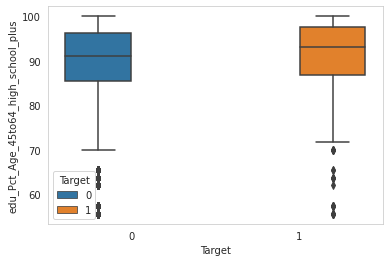

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,89.51,8.87,55.60,85.40,91.00,96.30,100.00
1,549.00,90.50,9.57,55.60,86.70,93.00,97.50,100.00





>>> edu_Pct_Age_45to64_bachelors_plus 



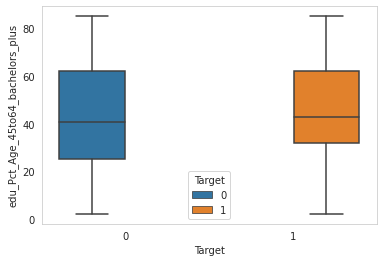

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,41.71,19.75,2.20,25.10,41.00,62.00,85.20
1,549.00,46.96,20.02,2.20,32.00,43.10,62.10,85.20





>>> edu_Pct_Age_65_plus_high_school_plus 



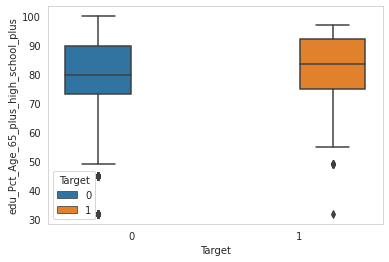

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,79.52,12.17,31.80,73.20,79.90,89.60,100.00
1,549.00,82.01,12.33,31.80,74.90,83.40,92.20,97.10





>>> edu_Pct_Age_65_plus_bachelors_plus 



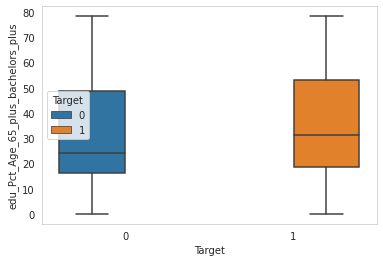

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,30.88,19.31,0.00,16.30,24.00,48.90,78.40
1,549.00,37.28,20.91,0.00,18.50,31.30,53.10,78.40





>>> sale_price 



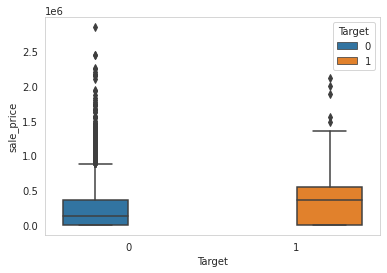

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,206173.80,245920.72,0.00,9.00,134000.00,355000.00,2850000.00
1,549.00,368918.02,324008.09,0.00,10.00,364000.00,550000.00,2125000.00





>>> DISTANCE 



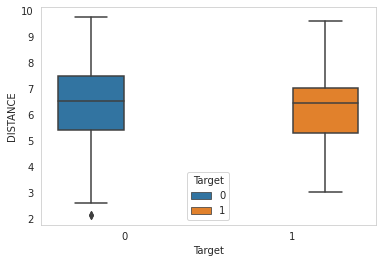

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,6.46,1.49,2.15,5.43,6.52,7.48,9.75
1,549.00,6.23,1.29,3.02,5.29,6.46,7.02,9.61





>>> AGE_BUILT 



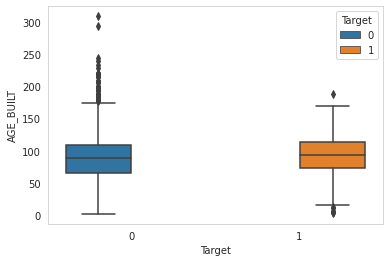

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,85.99,31.60,2.00,65.00,89.00,109.00,309.00
1,549.00,93.37,27.87,4.00,74.00,94.00,114.00,188.00





>>> AGE_REMODEL 



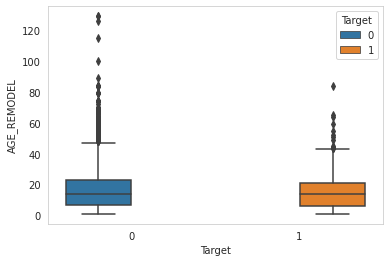

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,6666.00,17.45,14.27,1.00,7.00,14.00,23.00,129.00
1,193.00,16.37,14.03,1.00,6.00,14.00,21.00,84.00





>>> AGE_SALE 



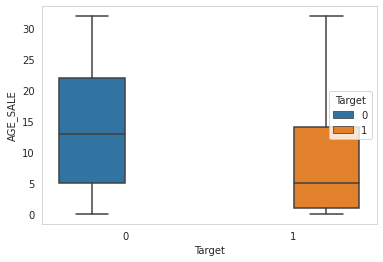

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,19442.00,14.12,10.23,0.00,5.00,13.00,22.00,32.00
1,549.00,8.49,9.56,0.00,1.00,5.00,14.00,32.00


In [42]:
# Show BoxPlot Comparisons: Targets vs NonTargets
for i in numvars:  
  print('\n>>>',i,'\n')
  bp = sns.boxplot(y=df5[i], x=df5['Target'], hue=df5['Target']  )
  # plt.grid(b=None);
  bp.yaxis.grid(False)
  bp.xaxis.grid(False)
  plt.show() 
  df5.groupby('Target')[i].describe()
  print('\n\n===================================================================== ')

# EDA Findings

*   NUM_FLOORS --- Keep - collapse 3/4 into 3+
*   STRUCTURE_CLASS --- Drop - No Value Add
*   R_BLDG_STYL --- Keep - collapse BW/RR/CV/SD, VT/RM/SL/RE/TD/CN/TL/BL/TF/OT
*   R_ROOF_TYP --- Keep - collapse F/S/O
*   R_EXT_FIN --- Keep - collapse C/S/U/P/V/G/K/O
*   R_FULL_BTH --- Keep - collapse 3+
*   R_HALF_BTH --- Keep - collapse 2+
*   R_BTH_STYLE --- Keep
*   R_BTH_STYLE2 --- Keep
*   R_KITCH --- Drop - No Value Add
*   R_KITCH_STYLE --- Keep
*   R_HEAT_TYP --- Keep - collapse E/P/N/S/O
*   R_AC --- Keep
*   R_FPLACE --- Keep - collapse 3+
*   R_EXT_CND --- Keep - collapse P/E
*   R_OVRALL_CND --- Keep - collapse P/E
*   R_INT_CND --- Drop - No Value Add
*   R_INT_FIN --- Drop - No Value Add
*   bi_num_bldgs --- Drop - No Value Add
*   bi_flood --- Drop - No Value Add
*   bi_stormwater --- Drop - No Value Add
*   REMODELED_EVER_FLAG --- Keep


*   AV_LAND --- Keep -  Skewed - Log Transform
*   AV_BLDG --- Keep -  Skewed - Log Transform
*   AV_TOTAL --- Keep -  Skewed - Log Transform
*   LAND_SF --- Keep -  Skewed - Log Transform
*   GROSS_AREA --- Keep -  Skewed - Log Transform
*   LIVING_AREA --- Keep -  Skewed - Log Transform
*   R_TOTAL_RMS --- Keep
*   R_BDRMS --- Keep - change to categorical and collapse
*   inc_cnt_fam_married_couple_total --- Keep
*   inc_pct_fam_married_couple_inc_lt_10000 --- Drop - No Value Add
*   inc_pct_fam_married_couple_inc_10000_14999 --- Drop - No Value Add
*   inc_pct_fam_married_couple_inc_15000_24999 --- Drop - No Value Add
*   inc_pct_fam_married_couple_inc_25000_34999 --- Drop - No Value Add
*   inc_pct_fam_married_couple_inc_35000_49999 --- Keep
*   inc_pct_fam_married_couple_inc_50000_74999 --- Keep
*   inc_pct_fam_married_couple_inc_75000_99999 --- Keep
*   inc_pct_fam_married_couple_inc_100000_149999 --- Keep
*   inc_pct_fam_married_couple_inc_150000_199999 --- Keep
*   inc_pct_fam_married_couple_inc_gt_200000 --- Keep
*   inc_othr_fam_married_couple_inc_median --- Keep
*   inc_cnt_hh_non_fam_total --- Keep
*   inc_pct_hh_non_fam_inc_lt_10000 --- Keep
*   inc_pct_hh_non_fam_inc_10000_14999 --- Keep
*   inc_pct_hh_non_fam_inc_15000_24999 --- Keep
*   inc_pct_hh_non_fam_inc_25000_34999 --- Keep
*   inc_pct_hh_non_fam_inc_35000_49999 --- Keep
*   inc_pct_hh_non_fam_inc_50000_74999 --- Keep
*   inc_pct_hh_non_fam_inc_75000_99999 --- Keep
*   inc_pct_hh_non_fam_inc_100000_149999 --- Keep
*   inc_pct_hh_non_fam_inc_150000_199999 --- Keep
*   inc_pct_hh_non_fam_inc_gt_200000 --- Keep
*   as_Cnt_Total_Population --- Keep
*   as_Othr_Median_age_(years) --- Keep
*   as_Ratio_Sex_ratio_(males_per_100_females) --- Keep
*   as_Ratio_Age_dependency_ratio --- Keep
*   as_Ratio_Old-age_dependency_ratio --- Keep
*   as_Ratio_Child_dependency_ratio --- Keep
*   as_Pct_Age_Under_5_years --- Keep
*   as_Pct_Age_5_to_9_years --- Keep
*   as_Pct_Age_10_to_14_years --- Keep
*   as_Pct_Age_15_to_19_years --- Keep
*   as_Pct_Age_20_to_24_years --- Keep
*   as_Pct_Age_25_to_29_years --- Keep
*   as_Pct_Age_30_to_34_years --- Keep
*   as_Pct_Age_35_to_39_years --- Keep
*   as_Pct_Age_40_to_44_years --- Keep
*   as_Pct_Age_45_to_49_years --- Keep
*   as_Pct_Age_50_to_54_years --- Keep
*   as_Pct_Age_55_to_59_years --- Keep
*   as_Pct_Age_60_to_64_years --- Keep
*   as_Pct_Age_65_to_69_years --- Keep
*   as_Pct_Age_70_to_74_years --- Keep
*   as_Pct_Age_75_to_79_years --- Keep
*   as_Pct_Age_80_to_84_years --- Keep
*   as_Pct_Age_85_years_and_over --- Keep
*   as_Pct_Age_5_to_14_years --- Keep
*   as_Pct_Age_15_to_17_years --- Keep
*   as_Pct_Age_Under_18_years --- Keep
*   as_Pct_Age_18_to_24_years --- Keep
*   as_Pct_Age_15_to_44_years --- Keep
*   as_Pct_Age_16_years_and_over --- Keep
*   as_Pct_Age_18_years_and_over --- Keep
*   as_Pct_Age_21_years_and_over --- Keep
*   as_Pct_Age_60_years_and_over --- Keep
*   as_Pct_Age_62_years_and_over --- Keep
*   as_Pct_Age_65_years_and_over --- Keep
*   as_Pct_Age_75_years_and_over --- Keep
*   as_Cnt_Male_Total_Population --- Keep
*   as_Othr_Male_Age_Median_age_(years) --- Keep
*   as_Cnt_Female_Total_Population --- Keep
*   as_Othr_Female_Age_Median_age_(years) --- Keep
*   as_Pct_Female_Age_21_years_and_over --- Keep
*   edu_Pct_Age_18to24_lt_high_school --- Keep
*   edu_Pct_Age_18to24_high_school --- Keep
*   edu_Pct_Age_18to24_some_college --- Keep
*   edu_Pct_Age_18to24_bachelors --- Keep
*   edu_Pct_Age_25_plus_lt_9th --- Keep
*   edu_Pct_Age_25_plus_some_high_school --- Keep
*   edu_Pct_Age_25_plus_high_school --- Keep
*   edu_Pct_Age_25_plus_some_college --- Keep
*   edu_Pct_Age_25_plus_associates --- Keep
*   edu_Pct_Age_25_plus_bachelors --- Keep
*   edu_Pct_Age_25_plus_grad_professional --- Keep
*   edu_Pct_Age_25_plus_high_school_plus --- Keep
*   edu_Pct_Age_25_plus_bachelors_plus --- Keep
*   edu_Pct_Age_25to34_high_school_plus --- Keep
*   edu_Pct_Age_25to34_bachelors_plus --- Keep
*   edu_Pct_Age_35to44_high_school_plus --- Keep
*   edu_Pct_Age_35to44_bachelors_plus --- Keep
*   edu_Pct_Age_45to64_high_school_plus --- Keep
*   edu_Pct_Age_45to64_bachelors_plus --- Keep
*   edu_Pct_Age_65_plus_high_school_plus --- Keep
*   edu_Pct_Age_65_plus_bachelors_plus --- Keep
*   sale_price --- Keep - Skewed - Log Tranform
*   DISTANCE --- Keep
*   AGE_BUILT --- Keep
*   AGE_REMODEL --- Keep - Skewed - Log Tranform
*   AGE_SALE --- Keep

### Collapse Categorical Variables

In [43]:
cat_transform = pd.DataFrame(df5[['PID'
, 'NUM_FLOORS'
, 'R_BLDG_STYL'
, 'R_ROOF_TYP'
, 'R_EXT_FIN'
, 'R_BDRMS'
, 'R_FULL_BTH'
, 'R_HALF_BTH'
, 'R_HEAT_TYP'
, 'R_FPLACE'
, 'R_EXT_CND'
, 'R_OVRALL_CND'
]])

# === 'NUM_FLOORS'
print('\n\n===============================================\n NUM_FLOORS \n')
cat_transform['NUM_FLOORS'].value_counts()
print('\n')
cat_transform['NUM_FLOORS'] = np.where(cat_transform['NUM_FLOORS'] >= 3, 3, cat_transform['NUM_FLOORS']  )
cat_transform['NUM_FLOORS'].value_counts()

# ===  'R_BLDG_STYL'
print('\n\n===============================================\n R_BLDG_STYL \n')
cat_transform['R_BLDG_STYL'].value_counts()
print('\n')
# cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'BW' , 'BW_RR_CV_SD', cat_transform['R_BLDG_STYL']  )
# cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'RR' , 'BW_RR_CV_SD', cat_transform['R_BLDG_STYL']  )
# cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'CV' , 'BW_RR_CV_SD', cat_transform['R_BLDG_STYL']  )
# cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'SD' , 'BW_RR_CV_SD', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'VT' , 'VT_RM_SL', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'RM' , 'VT_RM_SL', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'SL' , 'VT_RM_SL', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'RE' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'TD' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'CN' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'TL' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'BL' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'TF' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'] = np.where(cat_transform['R_BLDG_STYL'] == 'OT' , 'Other', cat_transform['R_BLDG_STYL']  )
cat_transform['R_BLDG_STYL'].value_counts()

# === 'R_ROOF_TYP'
print('\n\n===============================================\n R_ROOF_TYP \n')
cat_transform['R_ROOF_TYP'].value_counts()
print('\n')
cat_transform['R_ROOF_TYP'] = np.where(cat_transform['R_ROOF_TYP'] == 'F', 'F_S_O', cat_transform['R_ROOF_TYP']  )
cat_transform['R_ROOF_TYP'] = np.where(cat_transform['R_ROOF_TYP'] == 'S', 'F_S_O', cat_transform['R_ROOF_TYP']  )
cat_transform['R_ROOF_TYP'] = np.where(cat_transform['R_ROOF_TYP'] == 'O', 'F_S_O', cat_transform['R_ROOF_TYP']  )
cat_transform['R_ROOF_TYP'].value_counts()


# === 'R_EXT_FIN'
print('\n\n===============================================\n R_EXT_FIN \n')
cat_transform['R_EXT_FIN'].value_counts()
print('\n')
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'C' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'S' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'U' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'P' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'V' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'G' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'K' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'] = np.where(cat_transform['R_EXT_FIN'] == 'O' , 'Other', cat_transform['R_EXT_FIN']  )
cat_transform['R_EXT_FIN'].value_counts()

# === 'R_BDRMS'
print('\n\n===============================================\n R_BDRMS \n')
cat_transform['R_BDRMS'].value_counts()
print('\n')
cat_transform['R_BDRMS'] = np.where(cat_transform['R_BDRMS'] >= 6, 6, cat_transform['R_BDRMS']  )
cat_transform['R_BDRMS'] = np.where(cat_transform['R_BDRMS'] <= 2, 2, cat_transform['R_BDRMS']  )
cat_transform['R_BDRMS'].value_counts()

    
# === 'R_FULL_BTH'
print('\n\n===============================================\n R_FULL_BTH \n')
cat_transform['R_FULL_BTH'].value_counts()
print('\n')
cat_transform['R_FULL_BTH'] = np.where(cat_transform['R_FULL_BTH'] >= 3, 3, cat_transform['R_FULL_BTH']  )
cat_transform['R_FULL_BTH'].value_counts()

# === 'R_HALF_BTH'
print('\n\n===============================================\n R_HALF_BTH \n')
cat_transform['R_HALF_BTH'].value_counts()
print('\n')
cat_transform['R_HALF_BTH'] = np.where(cat_transform['R_HALF_BTH'] >= 2, 2, cat_transform['R_HALF_BTH']  )
cat_transform['R_HALF_BTH'].value_counts()

# === 'R_HEAT_TYP'
print('\n\n===============================================\n R_HEAT_TYP \n')
cat_transform['R_HEAT_TYP'].value_counts()
print('\n')
cat_transform['R_HEAT_TYP'] = np.where(cat_transform['R_HEAT_TYP'] == 'E', 'E_P_N_S_O', cat_transform['R_HEAT_TYP']  )
cat_transform['R_HEAT_TYP'] = np.where(cat_transform['R_HEAT_TYP'] == 'P', 'E_P_N_S_O', cat_transform['R_HEAT_TYP']  )
cat_transform['R_HEAT_TYP'] = np.where(cat_transform['R_HEAT_TYP'] == 'N', 'E_P_N_S_O', cat_transform['R_HEAT_TYP']  )
cat_transform['R_HEAT_TYP'] = np.where(cat_transform['R_HEAT_TYP'] == 'S', 'E_P_N_S_O', cat_transform['R_HEAT_TYP']  )
cat_transform['R_HEAT_TYP'] = np.where(cat_transform['R_HEAT_TYP'] == 'O', 'E_P_N_S_O', cat_transform['R_HEAT_TYP']  )
cat_transform['R_HEAT_TYP'].value_counts()
     
# === 'R_FPLACE'
print('\n\n===============================================\n R_FPLACE \n')
cat_transform['R_FPLACE'].value_counts()
print('\n')
cat_transform['R_FPLACE'] = np.where(cat_transform['R_FPLACE'] >= 3, 3, cat_transform['R_FPLACE']  )
cat_transform['R_FPLACE'].value_counts()

# === 'R_EXT_CND'
print('\n\n===============================================\n R_EXT_CND \n')
cat_transform['R_EXT_CND'].value_counts()
print('\n')
cat_transform['R_EXT_CND'] = np.where(cat_transform['R_EXT_CND'] == 'F', 'F_P_E', cat_transform['R_EXT_CND']  )
cat_transform['R_EXT_CND'] = np.where(cat_transform['R_EXT_CND'] == 'P', 'F_P_E', cat_transform['R_EXT_CND']  )
cat_transform['R_EXT_CND'] = np.where(cat_transform['R_EXT_CND'] == 'E', 'F_P_E', cat_transform['R_EXT_CND']  )
cat_transform['R_EXT_CND'].value_counts()


# === 'R_OVRALL_CND'
print('\n\n===============================================\n R_OVRALL_CND \n')
cat_transform['R_OVRALL_CND'].value_counts()
print('\n')
cat_transform['R_OVRALL_CND'] = np.where(cat_transform['R_OVRALL_CND'] == 'F', 'F_P_E', cat_transform['R_OVRALL_CND']  )
cat_transform['R_OVRALL_CND'] = np.where(cat_transform['R_OVRALL_CND'] == 'P', 'F_P_E', cat_transform['R_OVRALL_CND']  )
cat_transform['R_OVRALL_CND'] = np.where(cat_transform['R_OVRALL_CND'] == 'E', 'F_P_E', cat_transform['R_OVRALL_CND']  )
cat_transform['R_OVRALL_CND'].value_counts()



 NUM_FLOORS 



2.00    12117
1.00     4141
1.50     2439
2.50     1129
3.00      164
4.00        1
Name: NUM_FLOORS, dtype: int64

2.00    12117
1.00     4141
1.50     2439
2.50     1129
3.00      165
Name: NUM_FLOORS, dtype: int64



 R_BLDG_STYL 



CL    12326
CP     2905
RN     1439
BW      744
RR      683
CV      647
SD      449
VT      205
RM      196
SL      168
RE      100
TD       62
CN       39
TL       21
BL        3
TF        2
OT        2
Name: R_BLDG_STYL, dtype: int64

CL          12326
CP           2905
RN           1439
BW            744
RR            683
CV            647
VT_RM_SL      569
SD            449
Other         229
Name: R_BLDG_STYL, dtype: int64



 R_ROOF_TYP 



G    15384
H     2894
L     1002
M      354
F      188
S      167
O        2
Name: R_ROOF_TYP, dtype: int64

G        15384
H         2894
L         1002
F_S_O      357
M          354
Name: R_ROOF_TYP, dtype: int64



 R_EXT_FIN 



M    10755
W     5015
F     1793
A      959
B      687
C      248
S      226
U      141
P      102
V       61
G        2
K        1
O        1
Name: R_EXT_FIN, dtype: int64

M        10755
W         5015
F         1793
A          959
Other      782
B          687
Name: R_EXT_FIN, dtype: int64



 R_BDRMS 



3     10362
4      5116
2      2156
5      1554
6       572
7       104
1        88
8        22
9        15
10        1
0         1
Name: R_BDRMS, dtype: int64

3    10362
4     5116
2     2245
5     1554
6      714
Name: R_BDRMS, dtype: int64



 R_FULL_BTH 



1     13408
2      5677
3       807
4        81
5        15
6         2
21        1
Name: R_FULL_BTH, dtype: int64

1    13408
2     5677
3      906
Name: R_FULL_BTH, dtype: int64



 R_HALF_BTH 



1    10562
0     9006
2      417
3        5
4        1
Name: R_HALF_BTH, dtype: int64

1    10562
0     9006
2      423
Name: R_HALF_BTH, dtype: int64



 R_HEAT_TYP 



W    14192
F     5464
E      244
P       41
N       26
S       17
O        7
Name: R_HEAT_TYP, dtype: int64

W            14192
F             5464
E_P_N_S_O      335
Name: R_HEAT_TYP, dtype: int64



 R_FPLACE 



0    10053
1     8772
2      970
3      126
4       37
5       22
6        7
9        3
7        1
Name: R_FPLACE, dtype: int64

0    10053
1     8772
2      970
3      196
Name: R_FPLACE, dtype: int64



 R_EXT_CND 



A    15816
G     3741
F      417
P       12
E        5
Name: R_EXT_CND, dtype: int64

A        15816
G         3741
F_P_E      434
Name: R_EXT_CND, dtype: int64



 R_OVRALL_CND 



A    16151
G     3690
F      138
P        6
E        6
Name: R_OVRALL_CND, dtype: int64

A        16151
G         3690
F_P_E      150
Name: R_OVRALL_CND, dtype: int64

In [44]:
cat_transform.columns = ['PID'
, 'NUM_FLOORS_GRPD'
, 'R_BLDG_STYL_GRPD'
, 'R_ROOF_TYP_GRPD'
, 'R_EXT_FIN_GRPD'
, 'R_BDRMS_GRPD'
, 'R_FULL_BTH_GRPD'
, 'R_HALF_BTH_GRPD'
, 'R_HEAT_TYP_GRPD'
, 'R_FPLACE_GRPD'
, 'R_EXT_CND_GRPD'
, 'R_OVRALL_CND_GRPD'
]

cat_transform.head()


,PID,NUM_FLOORS_GRPD,R_BLDG_STYL_GRPD,R_ROOF_TYP_GRPD,R_EXT_FIN_GRPD,R_BDRMS_GRPD,R_FULL_BTH_GRPD,R_HALF_BTH_GRPD,R_HEAT_TYP_GRPD,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD
0,1000019000,3.00,VT_RM_SL,M,B,5,1,0,W,0,A,A
1,1000024000,3.00,VT_RM_SL,M,B,4,2,1,W,1,A,A
2,1000027000,3.00,VT_RM_SL,M,B,4,3,0,F,1,G,G
3,1000029000,3.00,VT_RM_SL,M,B,4,2,0,F,0,G,A
4,1000093000,3.00,VT_RM_SL,M,B,2,2,1,F,0,G,G


### Log Tranform Numeric Variables

In [45]:
log_transform = pd.DataFrame(df5['PID'])
log_transform['AV_LAND_LOG'] = np.log(df5['AV_LAND'])
log_transform['AV_BLDG_LOG'] = np.log(df5['AV_BLDG'])
log_transform['AV_TOTAL_LOG'] = np.log(df5['AV_TOTAL'])
log_transform['LAND_SF_LOG'] = np.log(df5['LAND_SF'])
log_transform['GROSS_AREA_LOG'] = np.log(df5['GROSS_AREA'])
log_transform['LIVING_AREA_LOG'] = np.log(df5['LIVING_AREA'])
log_transform['sale_price_LOG'] = np.log(df5['sale_price'])
log_transform['sale_price_LOG'] = log_transform['sale_price_LOG'].replace(float('-inf'), NaN)
log_transform['AGE_REMODEL_LOG'] = np.log(df5['AGE_REMODEL'])

print('\n\n ORIGINAL DATA \n\n')
df5[['AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'sale_price', 'AGE_REMODEL']].head()
df5[['AV_LAND', 'AV_BLDG', 'AV_TOTAL', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'sale_price', 'AGE_REMODEL']].info(verbose=True, show_counts=True ) 

print('\n\n LOG TRANSFORMED DATA \n\n')
log_transform.head()
log_transform.info(verbose=True, show_counts=True ) 



 ORIGINAL DATA 




/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,AV_LAND,AV_BLDG,AV_TOTAL,LAND_SF,GROSS_AREA,LIVING_AREA,sale_price,AGE_REMODEL
0,250900,524500,775400,1440.00,2688,2016,9,NaN
1,250900,611900,862800,1440.00,2712,2026,817500,3.00
2,250900,784200,1035100,1440.00,3168,2582,815000,19.00
3,250900,549600,800500,1440.00,2688,2016,0,NaN
4,278500,701600,980100,1600.00,2779,2184,0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 20050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AV_LAND      19991 non-null  int64  
 1   AV_BLDG      19991 non-null  int64  
 2   AV_TOTAL     19991 non-null  int64  
 3   LAND_SF      19991 non-null  float64
 4   GROSS_AREA   19991 non-null  int64  
 5   LIVING_AREA  19991 non-null  int64  
 6   sale_price   19991 non-null  int64  
 7   AGE_REMODEL  6859 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 1.9 MB


 LOG TRANSFORMED DATA 




,PID,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,sale_price_LOG,AGE_REMODEL_LOG
0,1000019000,12.43,13.17,13.56,7.27,7.90,7.61,2.20,NaN
1,1000024000,12.43,13.32,13.67,7.27,7.91,7.61,13.61,1.10
2,1000027000,12.43,13.57,13.85,7.27,8.06,7.86,13.61,2.94
3,1000029000,12.43,13.22,13.59,7.27,7.90,7.61,NaN,NaN
4,1000093000,12.54,13.46,13.80,7.38,7.93,7.69,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 20050
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              19991 non-null  int64  
 1   AV_LAND_LOG      19991 non-null  float64
 2   AV_BLDG_LOG      19991 non-null  float64
 3   AV_TOTAL_LOG     19991 non-null  float64
 4   LAND_SF_LOG      19991 non-null  float64
 5   GROSS_AREA_LOG   19991 non-null  float64
 6   LIVING_AREA_LOG  19991 non-null  float64
 7   sale_price_LOG   16707 non-null  float64
 8   AGE_REMODEL_LOG  6859 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 2.0 MB


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AV_LAND')

Text(0.5, 1.0, 'Log Transformed: AV_LAND_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AV_BLDG')

Text(0.5, 1.0, 'Log Transformed: AV_BLDG_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AV_TOTAL')

Text(0.5, 1.0, 'Log Transformed: AV_TOTAL_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: LAND_SF')

Text(0.5, 1.0, 'Log Transformed: LAND_SF_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: GROSS_AREA')

Text(0.5, 1.0, 'Log Transformed: GROSS_AREA_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: LIVING_AREA')

Text(0.5, 1.0, 'Log Transformed: LIVING_AREA_LOG')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: sale_price')

Text(0.5, 1.0, 'Log Transformed: sale_price')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AGE_REMODEL')

Text(0.5, 1.0, 'Log Transformed: AGE_REMODEL_LOG')

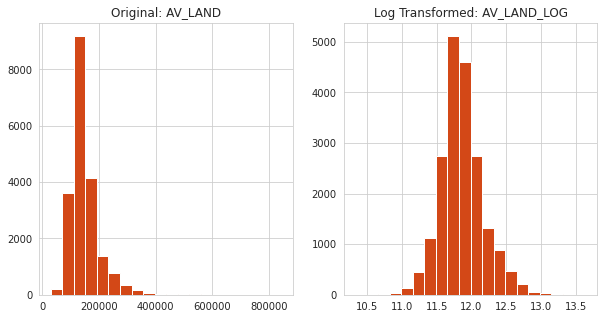

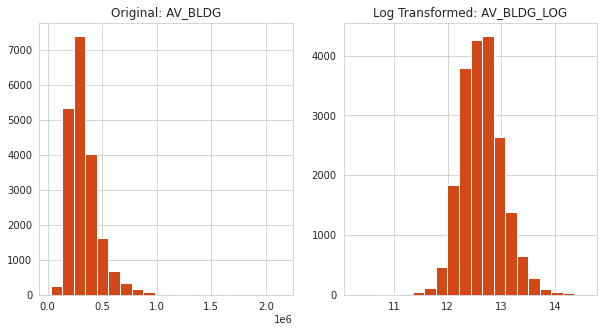

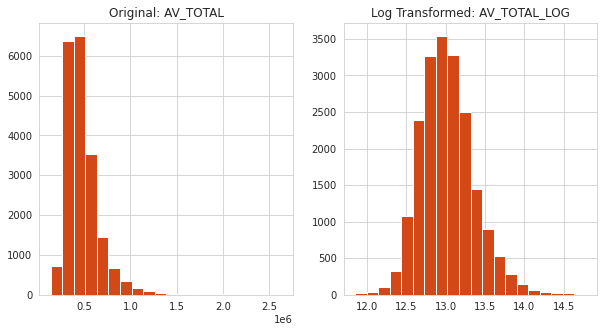

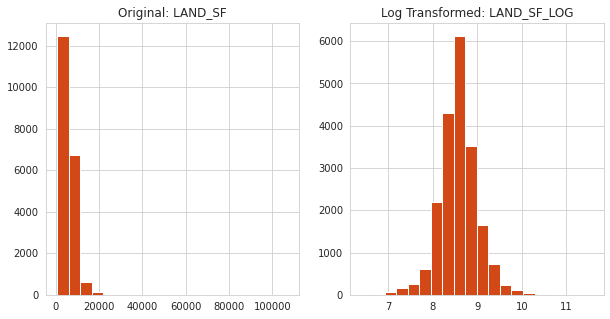

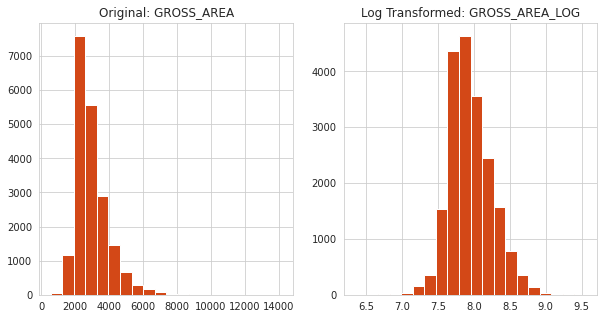

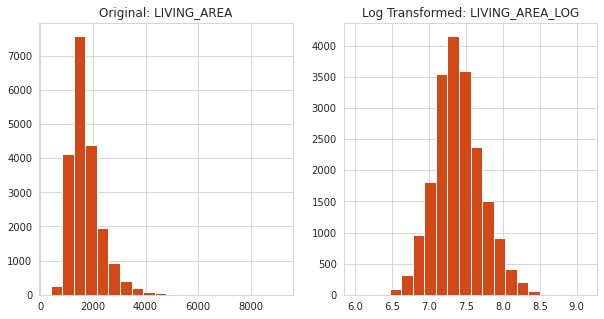

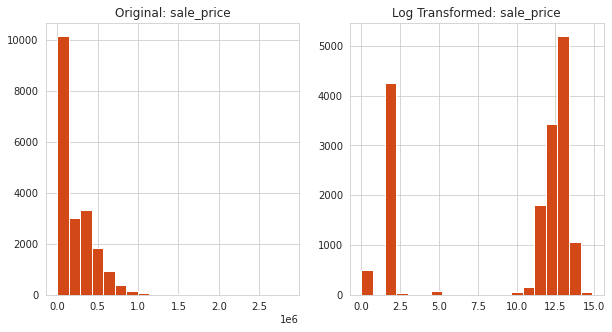

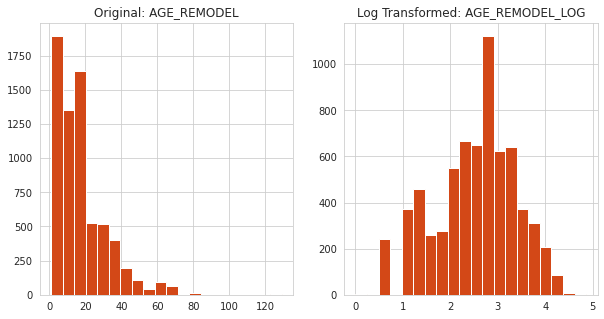

In [49]:
 # Show Plots of Original Data Compared to Log Transformed Version
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AV_LAND')
df5['AV_LAND'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AV_LAND_LOG')
log_transform['AV_LAND_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AV_BLDG')
df5['AV_BLDG'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AV_BLDG_LOG')
log_transform['AV_BLDG_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AV_TOTAL')
df5['AV_TOTAL'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AV_TOTAL_LOG')
log_transform['AV_TOTAL_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: LAND_SF')
df5['LAND_SF'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: LAND_SF_LOG')
log_transform['LAND_SF_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: GROSS_AREA')
df5['GROSS_AREA'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: GROSS_AREA_LOG')
log_transform['GROSS_AREA_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: LIVING_AREA')
df5['LIVING_AREA'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: LIVING_AREA_LOG')
log_transform['LIVING_AREA_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: sale_price')
df5['sale_price'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: sale_price')
log_transform['sale_price_LOG'].hist(bins=20, color='#D34817')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AGE_REMODEL')
df5['AGE_REMODEL'].hist(bins=20, color='#D34817')
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AGE_REMODEL_LOG')
log_transform['AGE_REMODEL_LOG'].hist(bins=20, color='#D34817')


### Add the Transformed Variables Back to the Primary DataFrame

Because of 2 peaks in the Log Transformation of Sale Price AND the introduciton of Null Values ...

DO NOT USE THE LOG TRANSFORMED VERSION

In [50]:
# Drop the Log Version of Sale Price

log_transform.drop(['sale_price_LOG'], axis=1, inplace=True)
 
df6 = df5.copy()
df6 = pd.merge(df6, cat_transform, left_on='PID', right_on="PID", how='left') 
df6 = pd.merge(df6, log_transform, left_on='PID', right_on="PID", how='left') 

In [51]:
# List of Categorical Variables that had Values Grouped/Collapsed
grpdvars = [
  'NUM_FLOORS'
, 'R_BLDG_STYL'
, 'R_ROOF_TYP'
, 'R_EXT_FIN'
, 'R_BDRMS'
, 'R_FULL_BTH'
, 'R_HALF_BTH'
, 'R_HEAT_TYP'
, 'R_FPLACE'
, 'R_EXT_CND'
, 'R_OVRALL_CND'
]

# List of Variables that were Log Tansformed
logvars = [
  'AV_LAND'
, 'AV_BLDG'
, 'AV_TOTAL'
, 'LAND_SF'
, 'GROSS_AREA'
, 'LIVING_AREA' 
, 'AGE_REMODEL'
]

#List of Variables that did not show any value
novalvars = [
  'STRUCTURE_CLASS'
, 'R_KITCH'
, 'R_INT_CND'
, 'R_INT_FIN'
, 'bi_num_bldgs'
, 'bi_flood'
, 'bi_stormwater'
, 'inc_pct_fam_married_couple_inc_lt_10000'
, 'inc_pct_fam_married_couple_inc_10000_14999'
, 'inc_pct_fam_married_couple_inc_15000_24999'
, 'inc_pct_fam_married_couple_inc_25000_34999'
]

modelset = df6.copy()
print('\n',modelset.shape )
modelset.drop(grpdvars, axis=1, inplace=True)
print('\n',modelset.shape )
modelset.drop(logvars, axis=1, inplace=True)
print('\n',modelset.shape )
modelset.drop(novalvars, axis=1, inplace=True)
print('\n',modelset.shape )
modelset.info(verbose=True, show_counts=True ) 



 (19991, 139)

 (19991, 128)

 (19991, 121)

 (19991, 110)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 110 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  int64  
 2    R_BTH_STYLE                                   19991 non-null  object 
 3    R_BTH_STYLE2                                  19991 non-null  object 
 4    R_KITCH_STYLE                                 19991 non-null  object 
 5    R_AC                                          19991 non-null  object 
 6    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 7    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  fl

In [ ]:
'''

In modeling....

These variables will be excluded as Independent variables:

PID -- this is the unique ID
Target -- this is the Y variable


These variables will be one-hot encoded:
 
NUM_FLOORS
R_BLDG_STYL
R_ROOF_TYP
R_EXT_FIN
R_BDRMS
R_FULL_BTH
R_HALF_BTH
R_BTH_STYLE
R_BTH_STYLE2
R_KITCH_STYLE
R_HEAT_TYP
R_AC
R_FPLACE
R_EXT_CND
R_OVRALL_CND
REMODELED_EVER_FLAG

All Other Variables will be treated as continuous.


'''

# Output Data to CSV for Modeling

In [ ]:
df6.to_csv('pa_2019_eda_output.csv', header=True, index=False)
modelset.to_csv('pa_2019_classification_modeling_input.csv', header=True, index=False)